# Lab 7- Data Analysis

In this lab, you download and begin to look at a particle physics dataset. You must download the dataset by March 17th. Exercises 1-4 are to be completed by March 21th. The remaider of the lab is due March 29th. Before leaving lab today, I suggest everyone downloads the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf). 

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms. 

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY). 

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS: 
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [16]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  7012k      0 --:--:--  0:02:08 --:--:-- 17.0M


In [ ]:
!gunzip SUSY.csv.gz

In [1]:
ls -lh

total 2.5G
-rw-r--r-- 1 jduong0812 jduong0812 566K Mar 21 23:20 Lab.7.ipynb
-rw-r--r-- 1 jduong0812 jduong0812 6.0M Mar 21 23:02 Lab.7_solutions.ipynb
-rw-r--r-- 1 jduong0812 jduong0812 228M Mar 21 23:21 SUSY-small.csv
-rw-r--r-- 1 jduong0812 jduong0812 2.3G Mar 21 23:19 SUSY.csv


The data is provided as a comma separated file.

In [3]:
filename="SUSY.csv"
# Print out the first 5 lines using unix head command.
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [3]:
!ls -lh

total 2.5G
-rw-r--r-- 1 jduong0812 jduong0812 566K Mar 21 23:20 Lab.7.ipynb
-rw-r--r-- 1 jduong0812 jduong0812 6.0M Mar 21 23:02 Lab.7_solutions.ipynb
-rw-r--r-- 1 jduong0812 jduong0812 228M Mar 21 23:21 SUSY-small.csv
-rw-r--r-- 1 jduong0812 jduong0812 2.3G Mar 21 23:19 SUSY.csv


We see that we have 5 million datapoints.

In [4]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [5]:
!head -500000 SUSY.csv > SUSY-small.csv

In [6]:
ls -lh

total 2.5G
-rw-r--r-- 1 jduong0812 jduong0812 566K Mar 21 23:20 Lab.7.ipynb
-rw-r--r-- 1 jduong0812 jduong0812 6.0M Mar 21 23:02 Lab.7_solutions.ipynb
-rw-r--r-- 1 jduong0812 jduong0812 228M Mar 21 23:23 SUSY-small.csv
-rw-r--r-- 1 jduong0812 jduong0812 2.3G Mar 21 23:19 SUSY.csv


In [7]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [4]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [5]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [6]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [7]:
FeatureNames

['M_Delta_R',
 'axial_MET',
 'MET_rel',
 'M_R',
 'MT2',
 'R',
 'M_TR_2',
 'S_R',
 'dPhi_r_b',
 'cos_theta_r1']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [9]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [14]:
df

signal    l_1_pT   l_1_eta   l_1_phi    l_2_pT   l_2_eta   l_2_phi  \
0           0.0  0.972861  0.653855  1.176225  1.157156 -1.739873 -0.874309   
1           1.0  1.667973  0.064191 -1.225171  0.506102 -0.338939  1.672543   
2           1.0  0.444840 -0.134298 -0.709972  0.451719 -1.613871 -0.768661   
3           1.0  0.381256 -0.976145  0.693152  0.448959  0.891753 -0.677328   
4           1.0  1.309996 -0.690089 -0.676259  1.589283 -0.693326  0.622907   
...         ...       ...       ...       ...       ...       ...       ...   
4999995     1.0  0.853325 -0.961783 -1.487277  0.678190  0.493580  1.647969   
4999996     0.0  0.951581  0.139370  1.436884  0.880440 -0.351948 -0.740852   
4999997     0.0  0.840389  1.419162 -1.218766  1.195631  1.695645  0.663756   
4999998     1.0  1.784218 -0.833565 -0.560091  0.953342 -0.688969 -1.428233   
4999999     0.0  0.761500  0.680454 -1.186213  1.043521 -0.316755  0.246879   

              MET   MET_phi   MET_rel  axial_MET       M_R    M_TR_2  \
0        0.567765 -0.175000  0.810061  -0.252552  1.921887  0.889637   
1        3.475464 -1.219136  0.012955   3.775174  1.045977  0.568051   
2        1.219918  0.504026  1.831248  -0.431385  0.526283  0.941514   
3        2.033060  1.533041  3.046260  -1.005285  0.569386  1.015211   
4        1.087562 -0.381742  0.589204   1.365479  1.179295  0.968218   
...           ...       ...       ...        ...       ...       ...   
4999995  1.843867  0.276954  1.025105  -1.486535  0.892879  1.684429   
4999996  0.290863 -0.732360  0.001360   0.257738  0.802871  0.545319   
4999997  0.490888 -0.509186  0.704289   0.045744  0.825015  0.723530   
4999998  2.660703 -0.861344  2.116892   2.906151  1.232334  0.952444   
4999999  1.120280  0.998479  1.640881  -0.797688  0.854212  1.121858   

                R       MT2       S_R  M_Delta_R  dPhi_r_b  cos_theta_r1  
0        0.410772  1.145621  1.932632   0.994464  1.367815      0.040714  
1        0.481928  0.000000  0.448410   0.205356  1.321893      0.377584  
2        1.587535  2.024308  0.603498   1.562374  1.135454      0.180910  
3        1.582217  1.551914  0.761215   1.715464  1.492257      0.090719  
4        0.728563  0.000000  1.083158   0.043429  1.154854      0.094859  
...           ...       ...       ...        ...       ...           ...  
4999995  1.674084  3.366298  1.046707   2.646649  1.389226      0.364599  
4999996  0.602730  0.002998  0.748959   0.401166  0.443471      0.239953  
4999997  0.778236  0.752942  0.838953   0.614048  1.210595      0.026692  
4999998  0.685846  0.000000  0.781874   0.676003  1.197807      0.093689  
4999999  1.165438  1.498351  0.931580   1.293524  1.539167      0.187496  

[5000000 rows x 19 columns]

The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [10]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


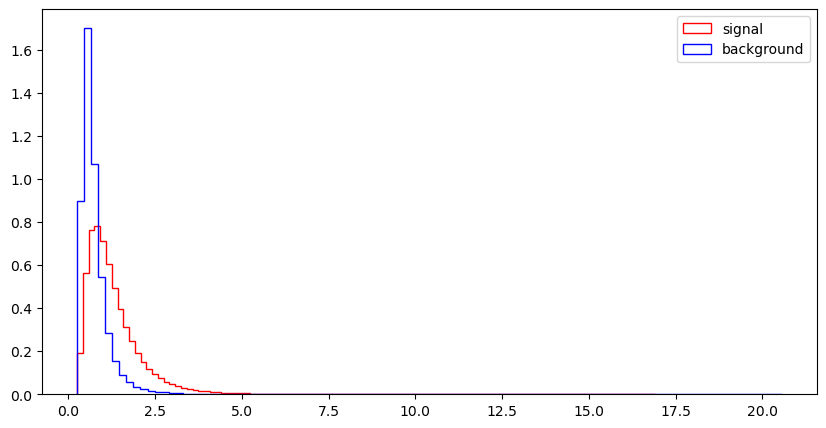

l_1_eta


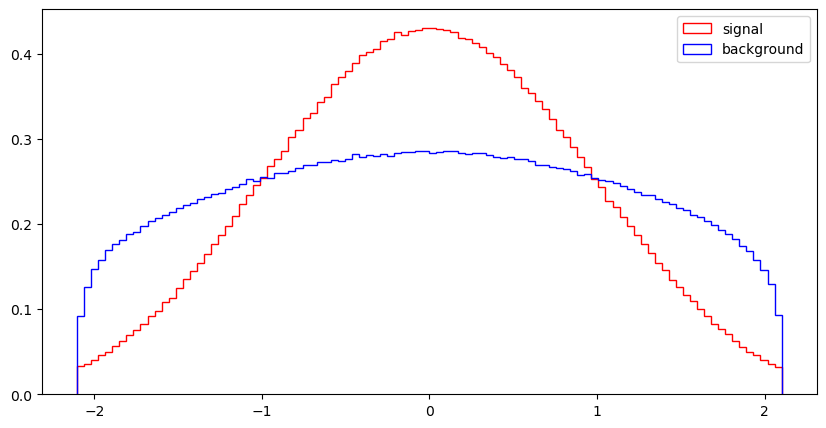

l_1_phi


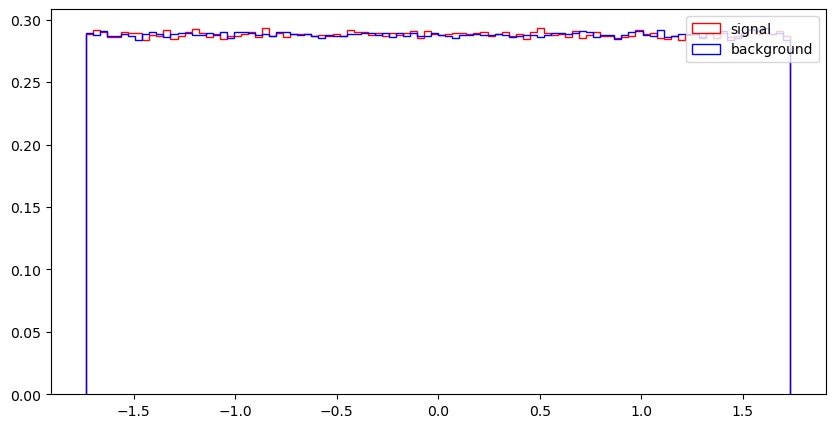

l_2_pT


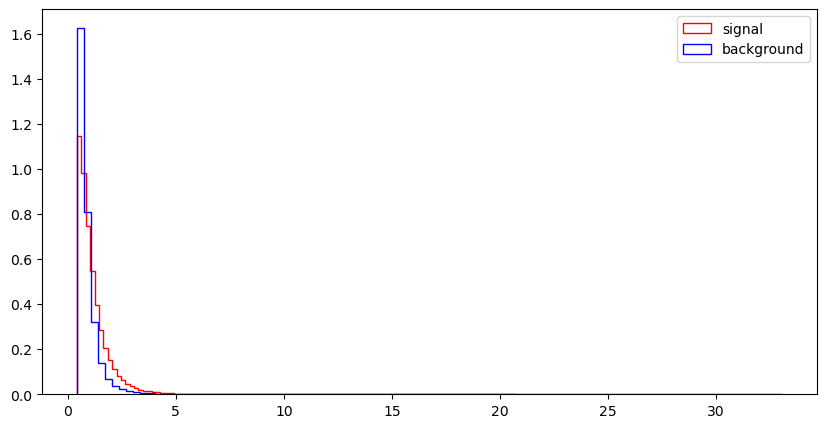

l_2_eta


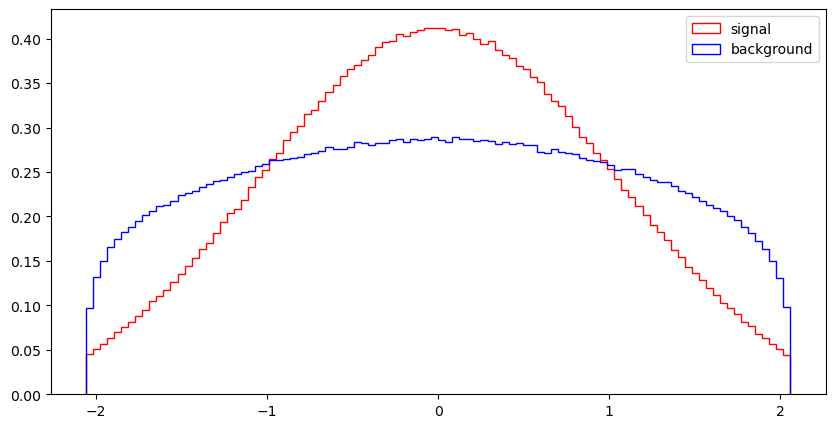

l_2_phi


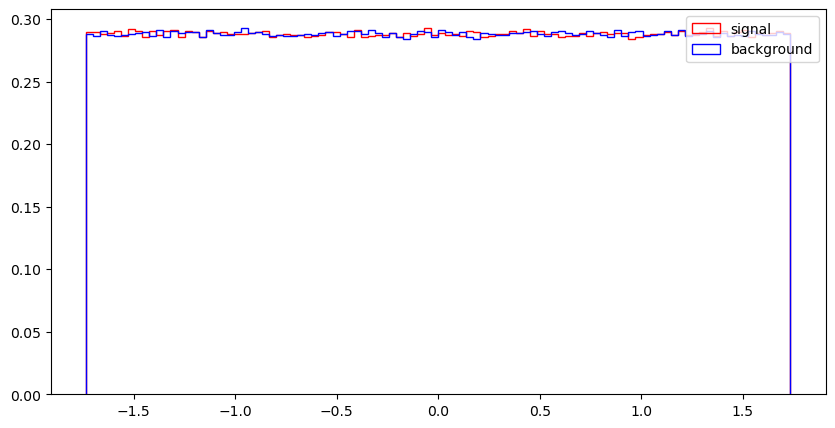

MET


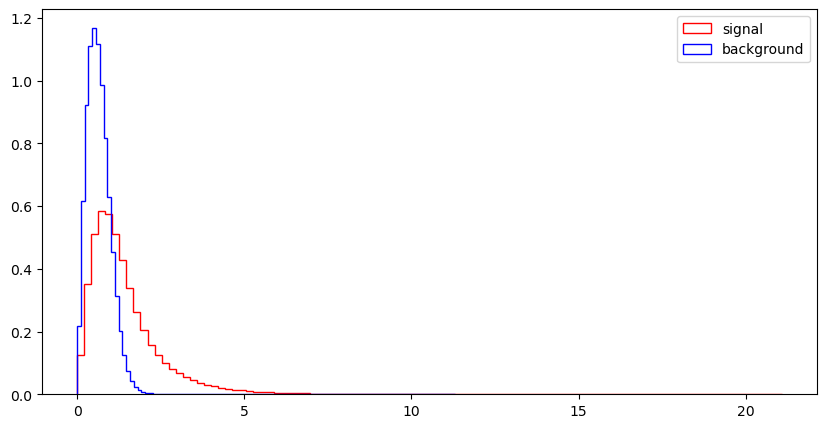

MET_phi


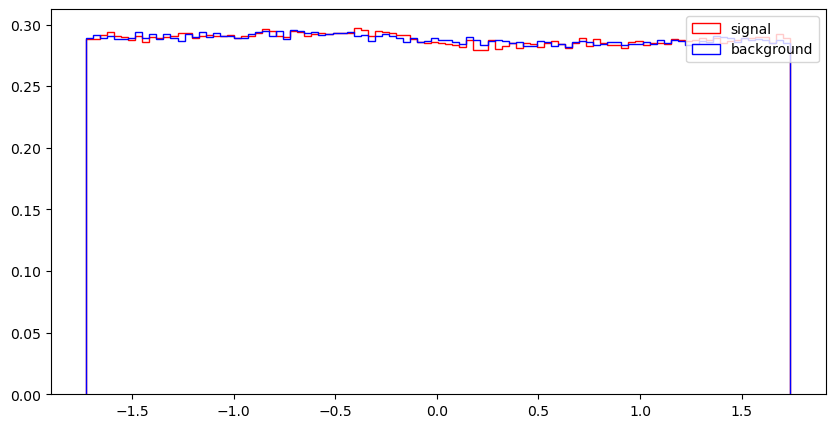

MET_rel


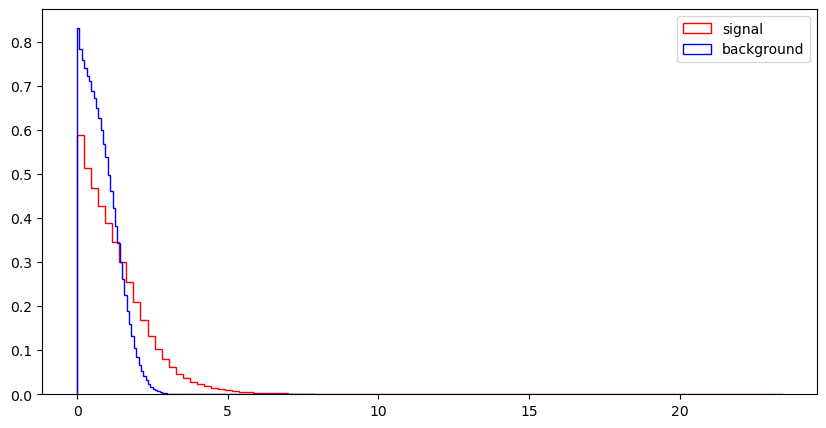

axial_MET


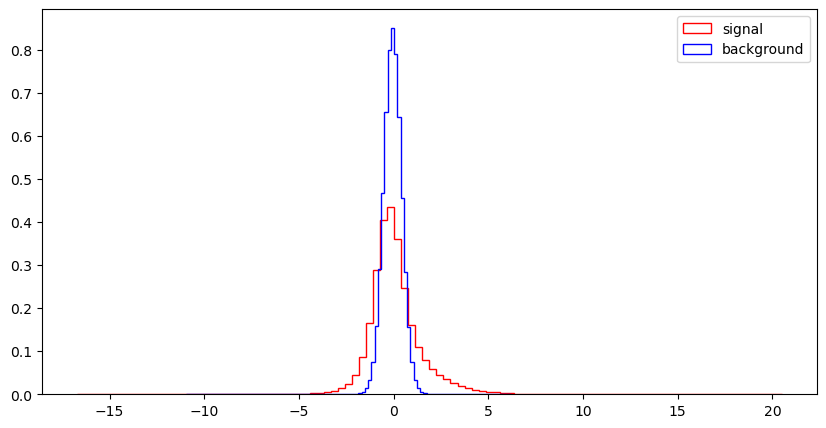

M_R


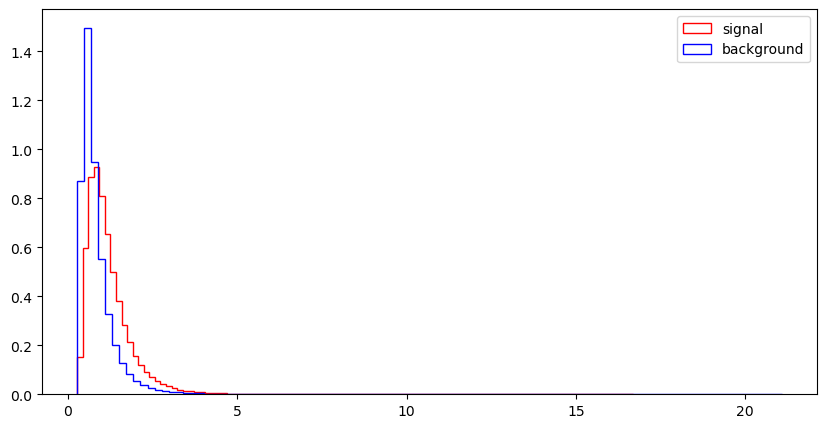

M_TR_2


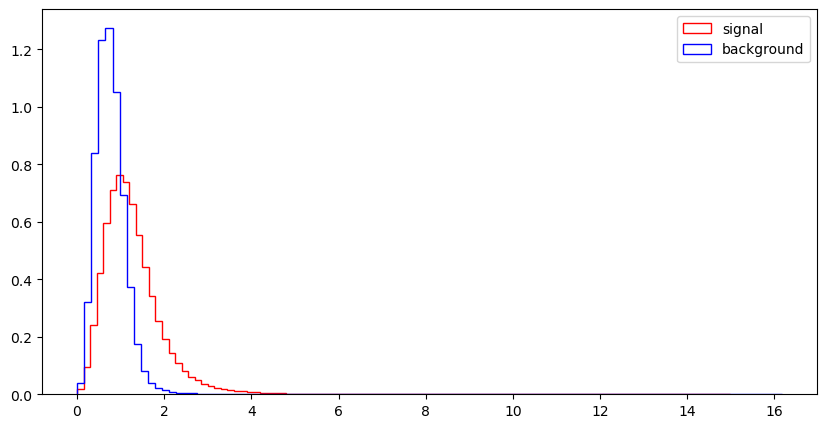

R


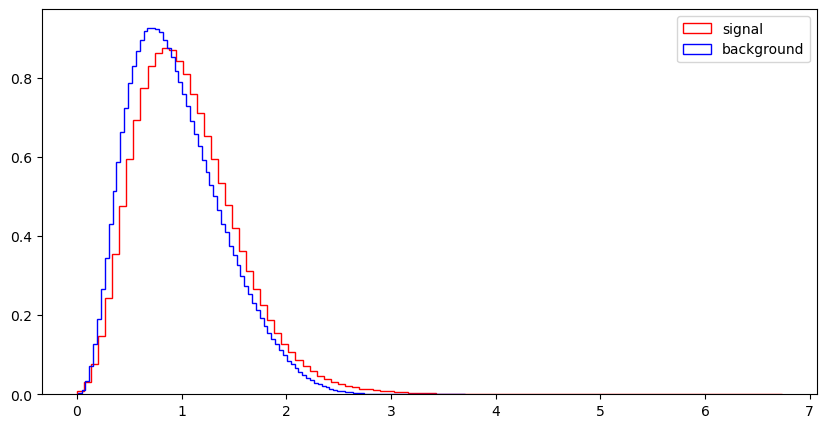

MT2


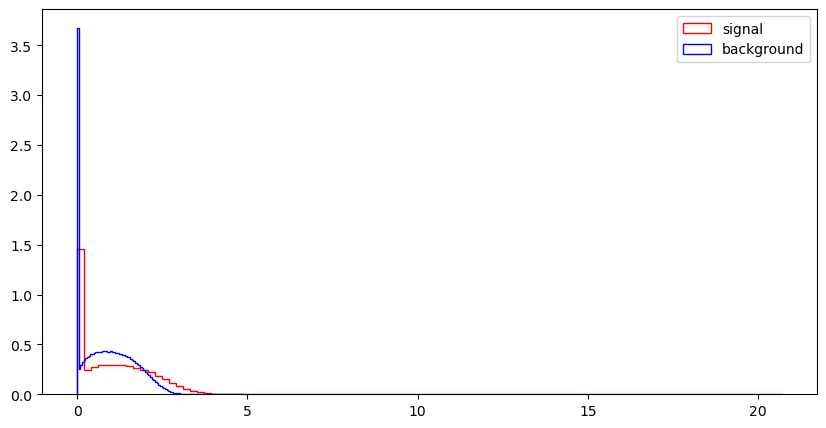

S_R


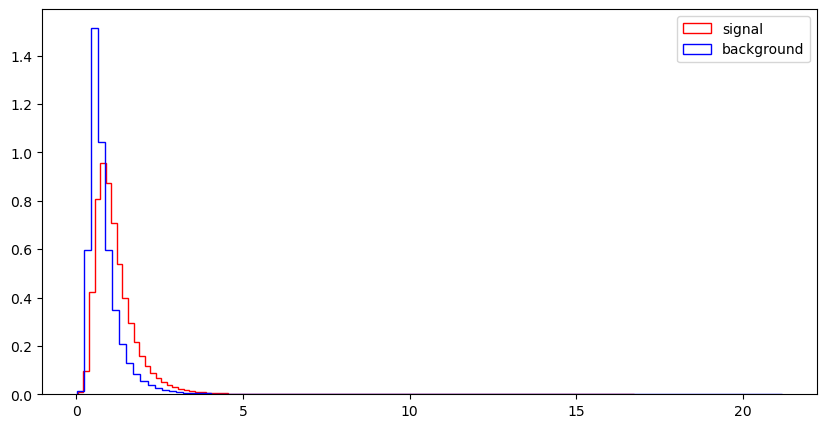

M_Delta_R


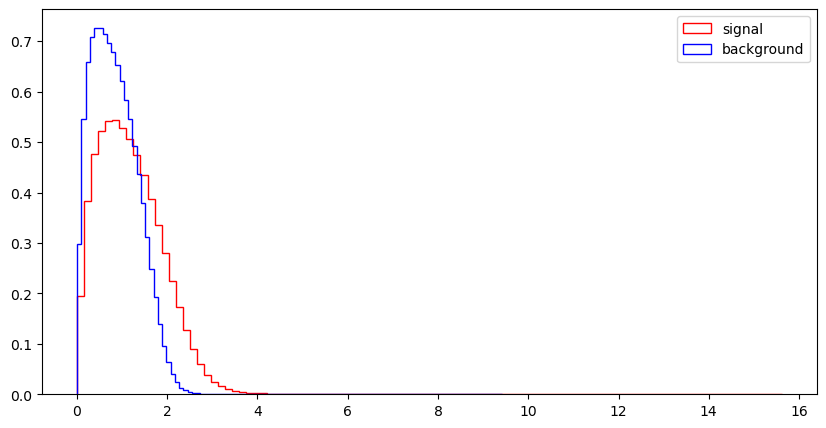

dPhi_r_b


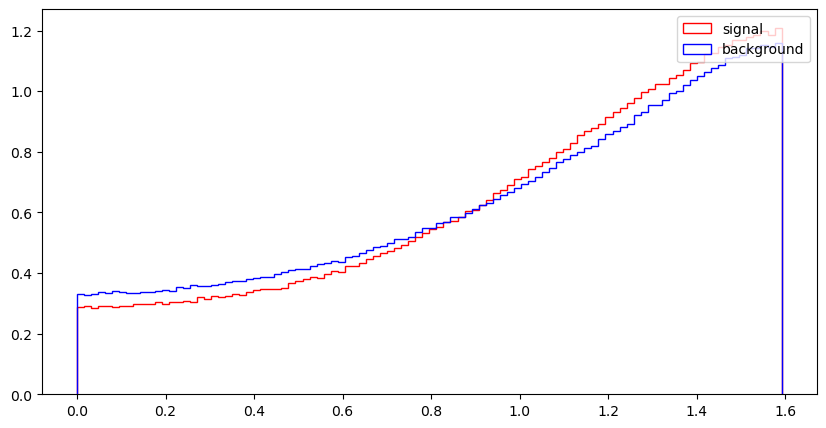

cos_theta_r1


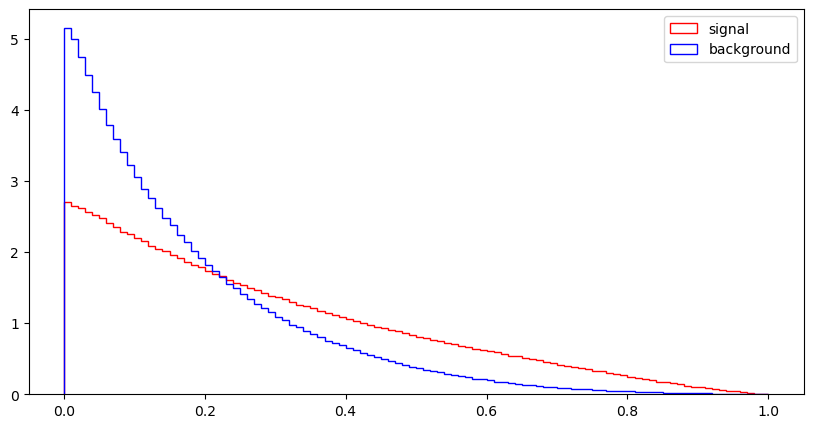

In [6]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

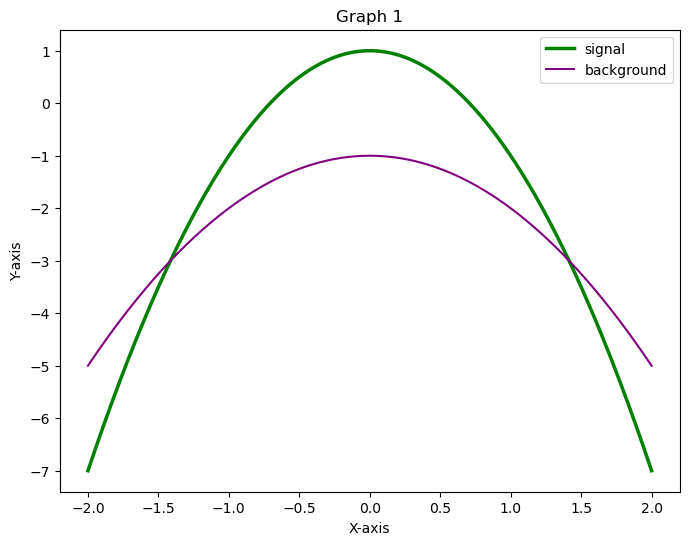

In [16]:
### Parabolic Graph ###

import matplotlib.pyplot as plt
import numpy as np

# Set range of x values.
x = np.linspace(-2, 2, 500)

# Define both functions.
a = -2  
b = 0
c = 1
d = -1
e = 0
f = -1

y = a * x**2 + b * x + c
y2 = d * x**2 + e * x + f

# Creates a figure with axes.
plt.figure(figsize=(8, 6))

# Plfileots the the first function with y.
plt.plot(x, y, label="signal", color="green", linewidth=2.5)

# Plots the the second function with y2.
plt.plot(x, y2, label="background", color="purple", linewidth=1.5)

# Labels title, axes, and legend.
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Graph 1")
plt.legend()  

# Show the plot.
plt.show()

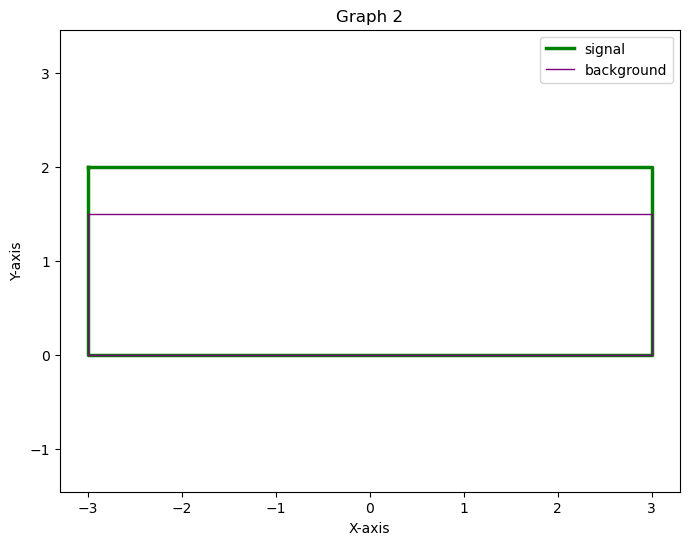

In [17]:
### Rectangular Graph

# Set rectangle parameters.
x = [-3, 3, 3, -3, -3]  
y = [2, 2, 0, 0, 2] 
y2 = [ 1.5, 1.5, 0, 0, 1.5]

# Create a figure with axes.
plt.figure(figsize=(8, 6))

# Plot the first function with y.
plt.plot(x, y, label="signal", color="green", linewidth=2.5)

# Plot the second function
plt.plot(x, y2, label="background", color="purple", linewidth=1)

plt.ylim(0, None) 

# Labels title, axes, and legend.
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Graph 2")
plt.legend()  

# Automatically set aspect ratio.
plt.axis("equal")

# Show the plot.
plt.show()

## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

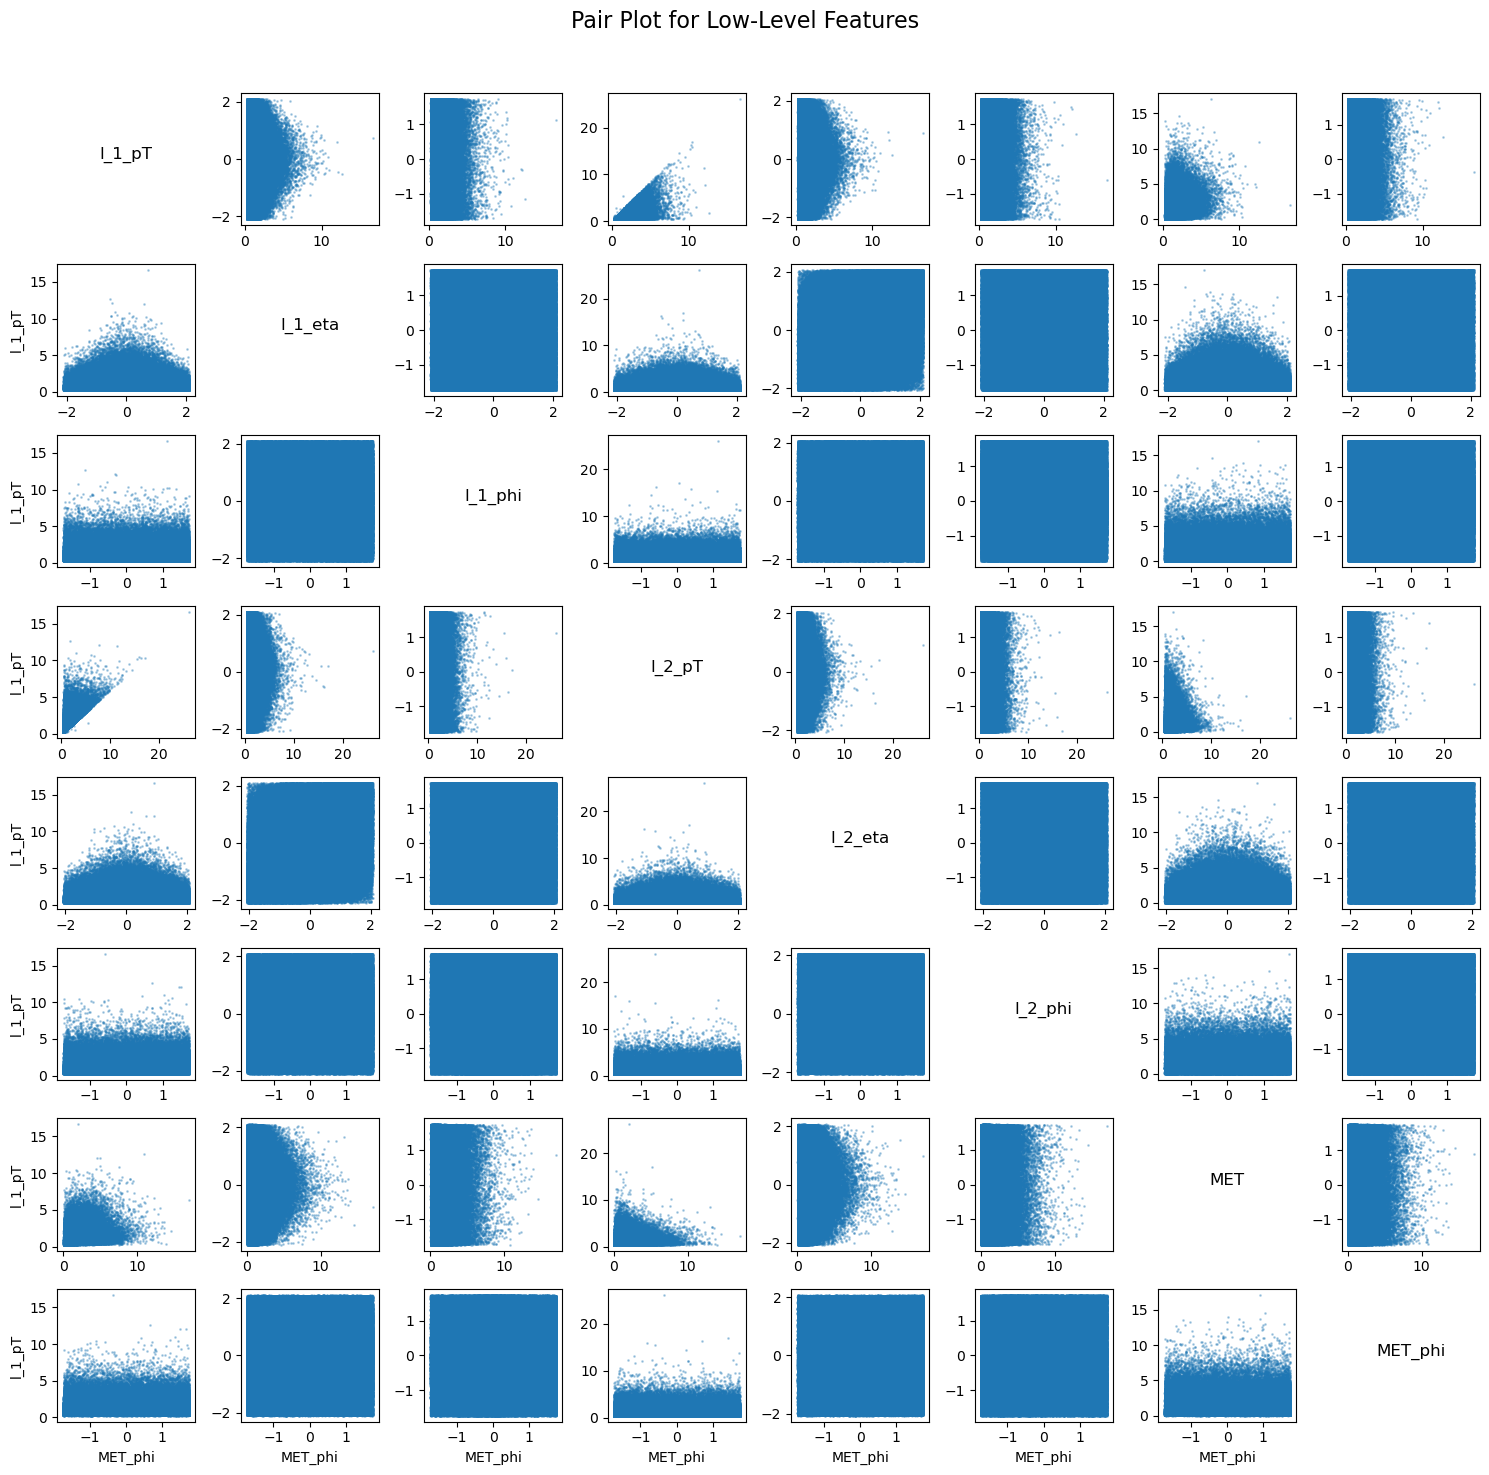

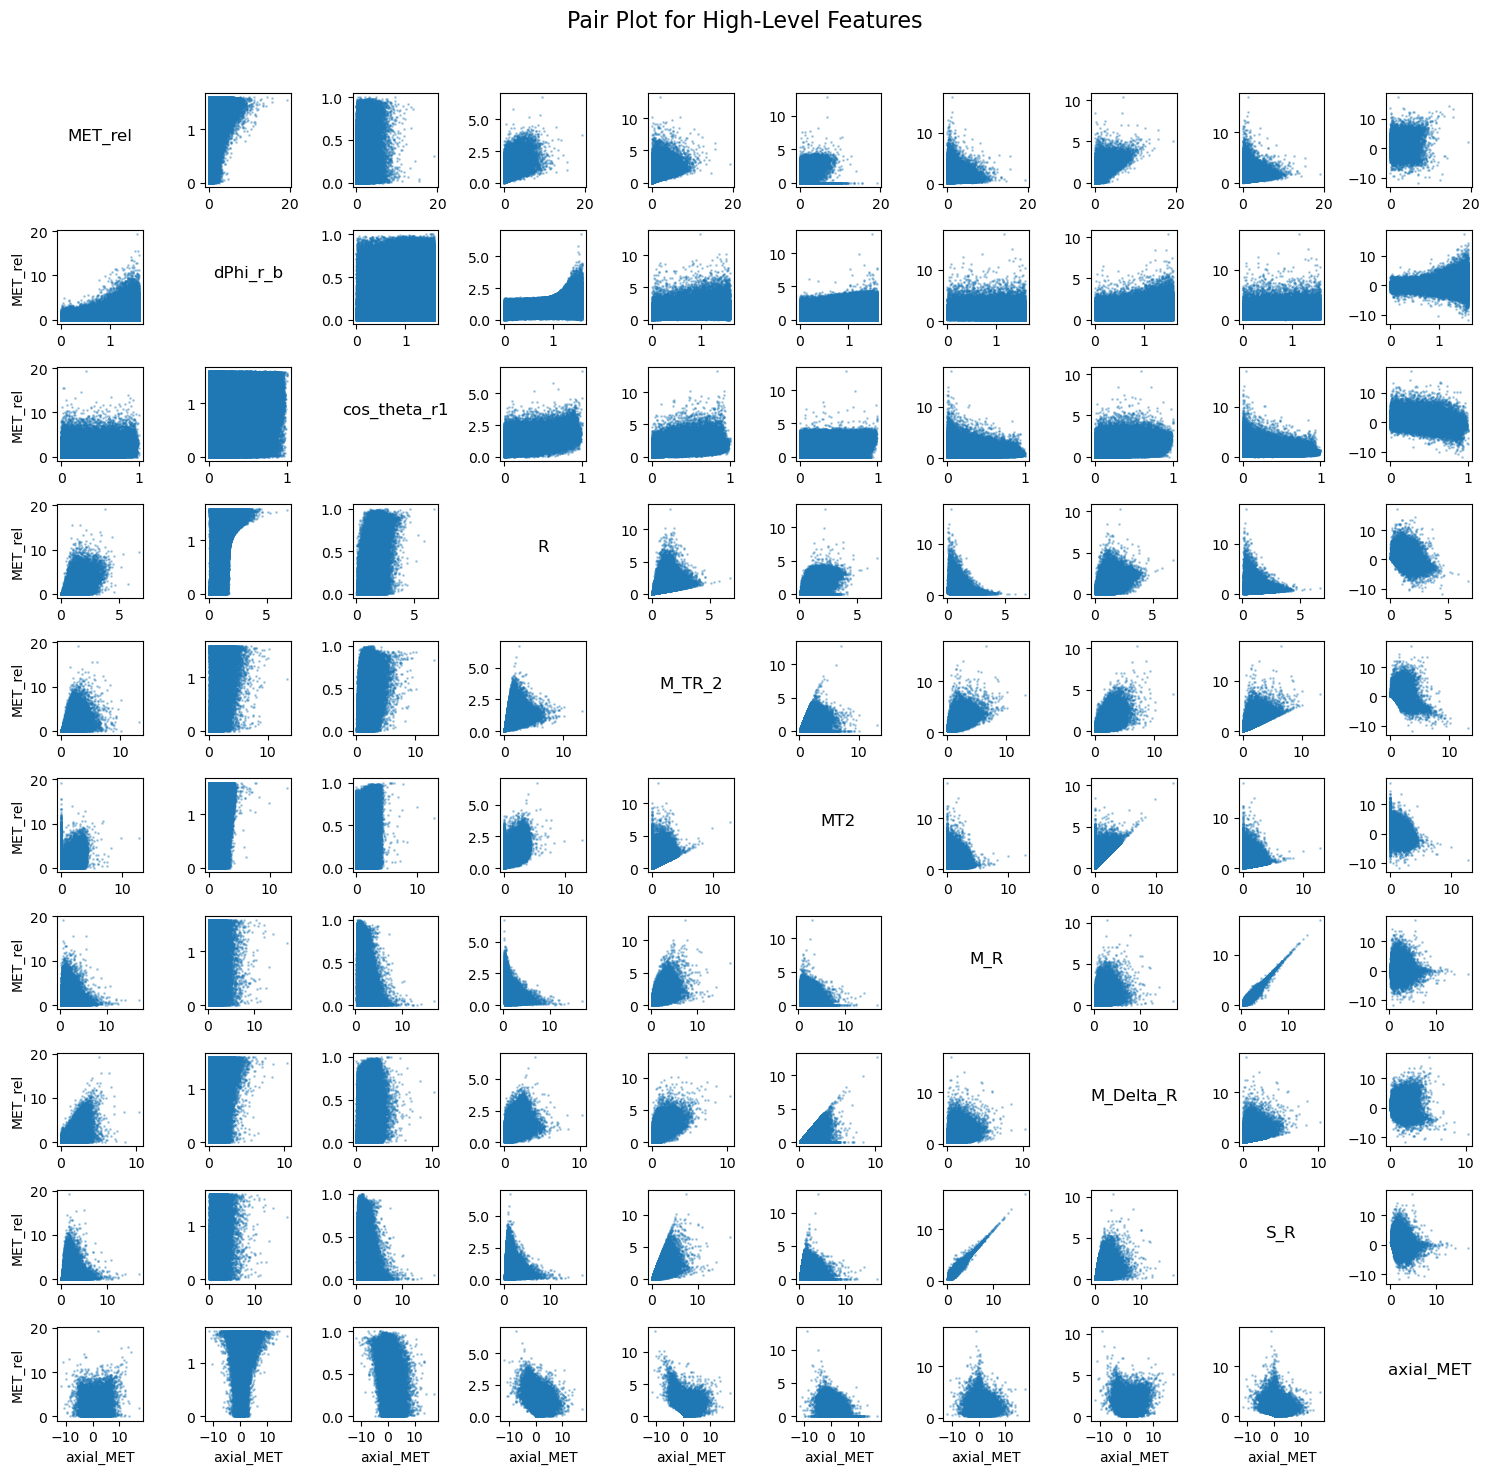

In [11]:
### Part A ###

import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations

filename_2 = "SUSY-small.csv"
susy_df = pd.read_csv(filename_2, dtype='float64', names=VarNames)

def pair_plot(data: pd.DataFrame, feature_names: list, title: str = "Pair Plot"):
    num_features = len(feature_names)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    
    for i, feature_x in enumerate(feature_names):
        for j, feature_y in enumerate(feature_names):
            ax = axes[i, j]
            
            if i == j:
                ax.text(0.5, 0.5, feature_x, fontsize=12, ha='center')
                ax.axis('off')
            else:
                ax.scatter(data[feature_x], data[feature_y], alpha=0.3, s=1)
            
            if j == 0:
                ax.set_ylabel(feature_y)
            if i == num_features - 1:
                ax.set_xlabel(feature_x)
                
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_features = ['MET_rel', 'dPhi_r_b', 'cos_theta_r1', 'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET']

pair_plot(susy_df, low_level_features, title="Pair Plot for Low-Level Features")
pair_plot(susy_df, high_level_features, title="Pair Plot for High-Level Features")


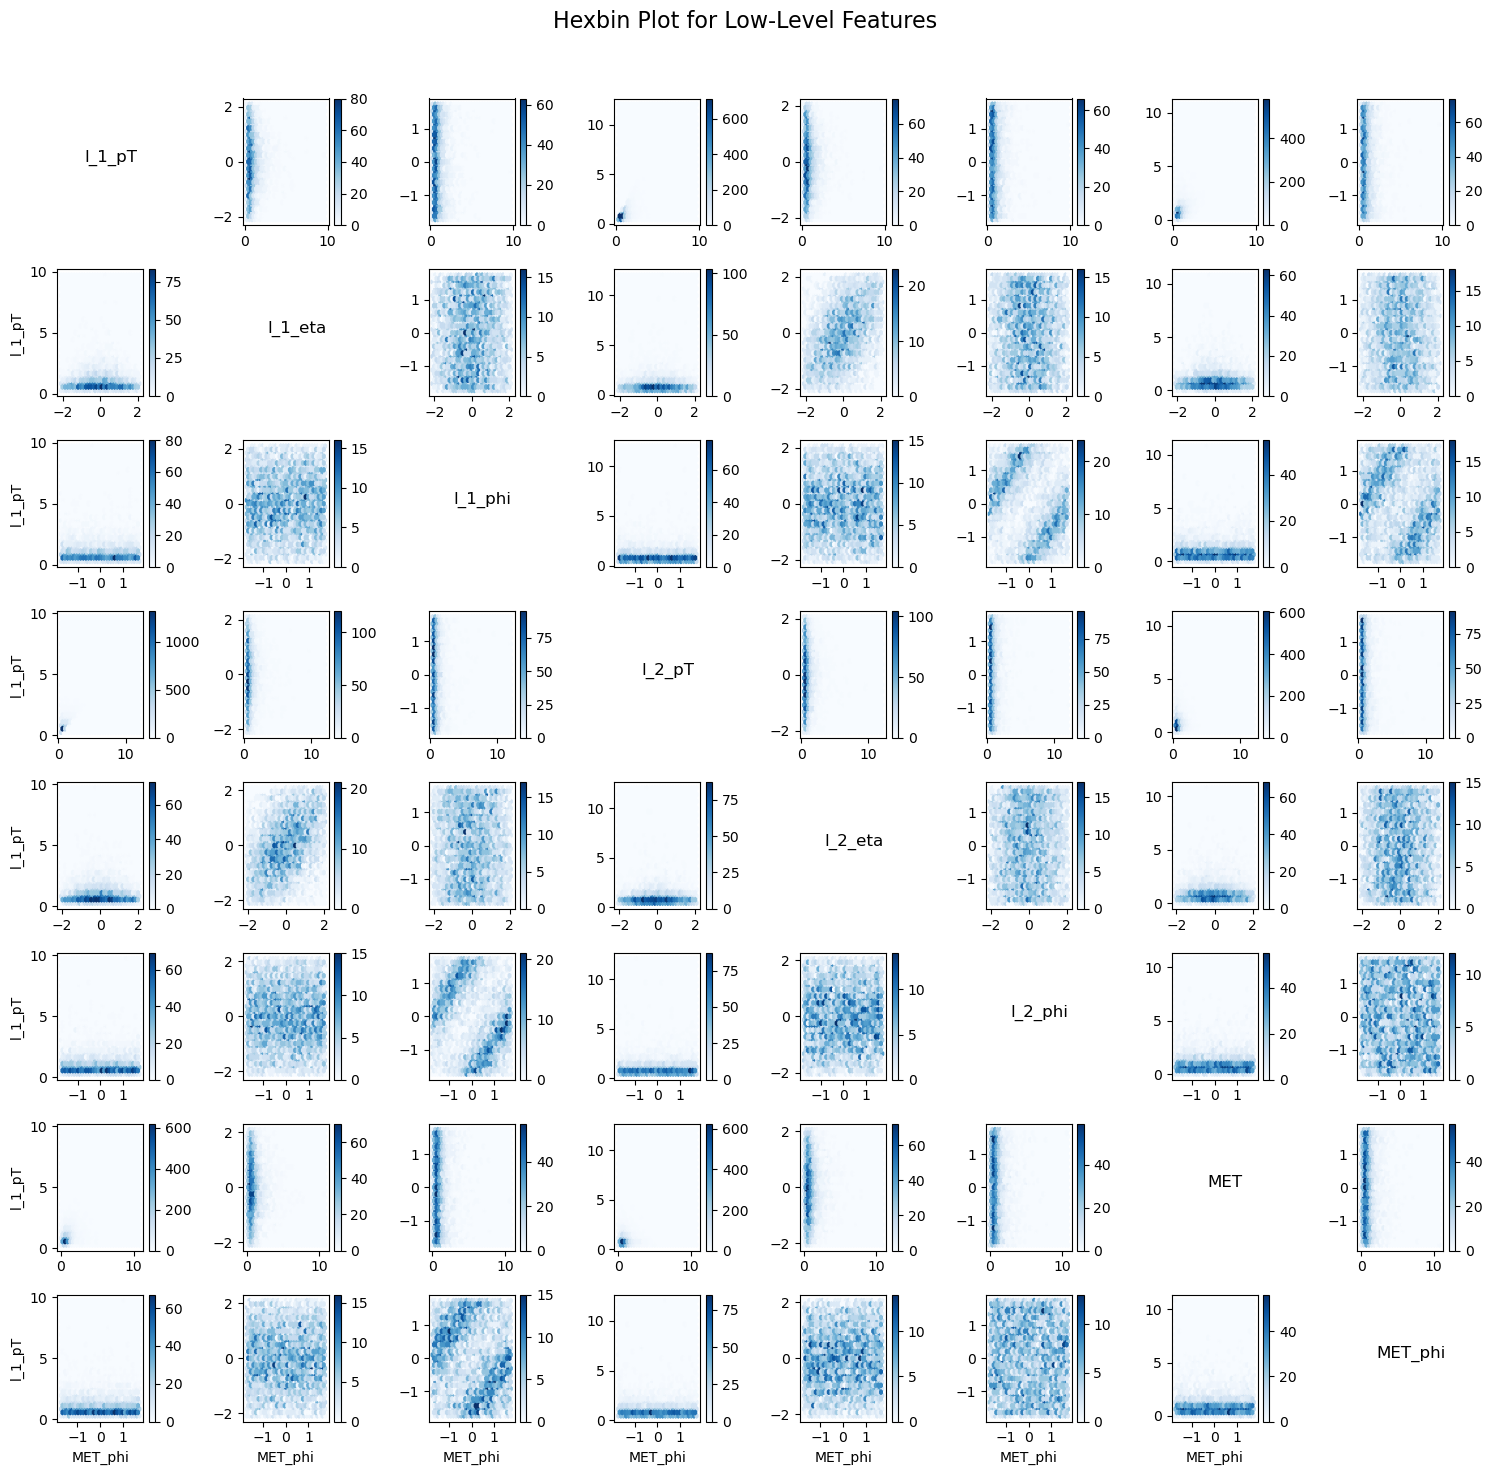

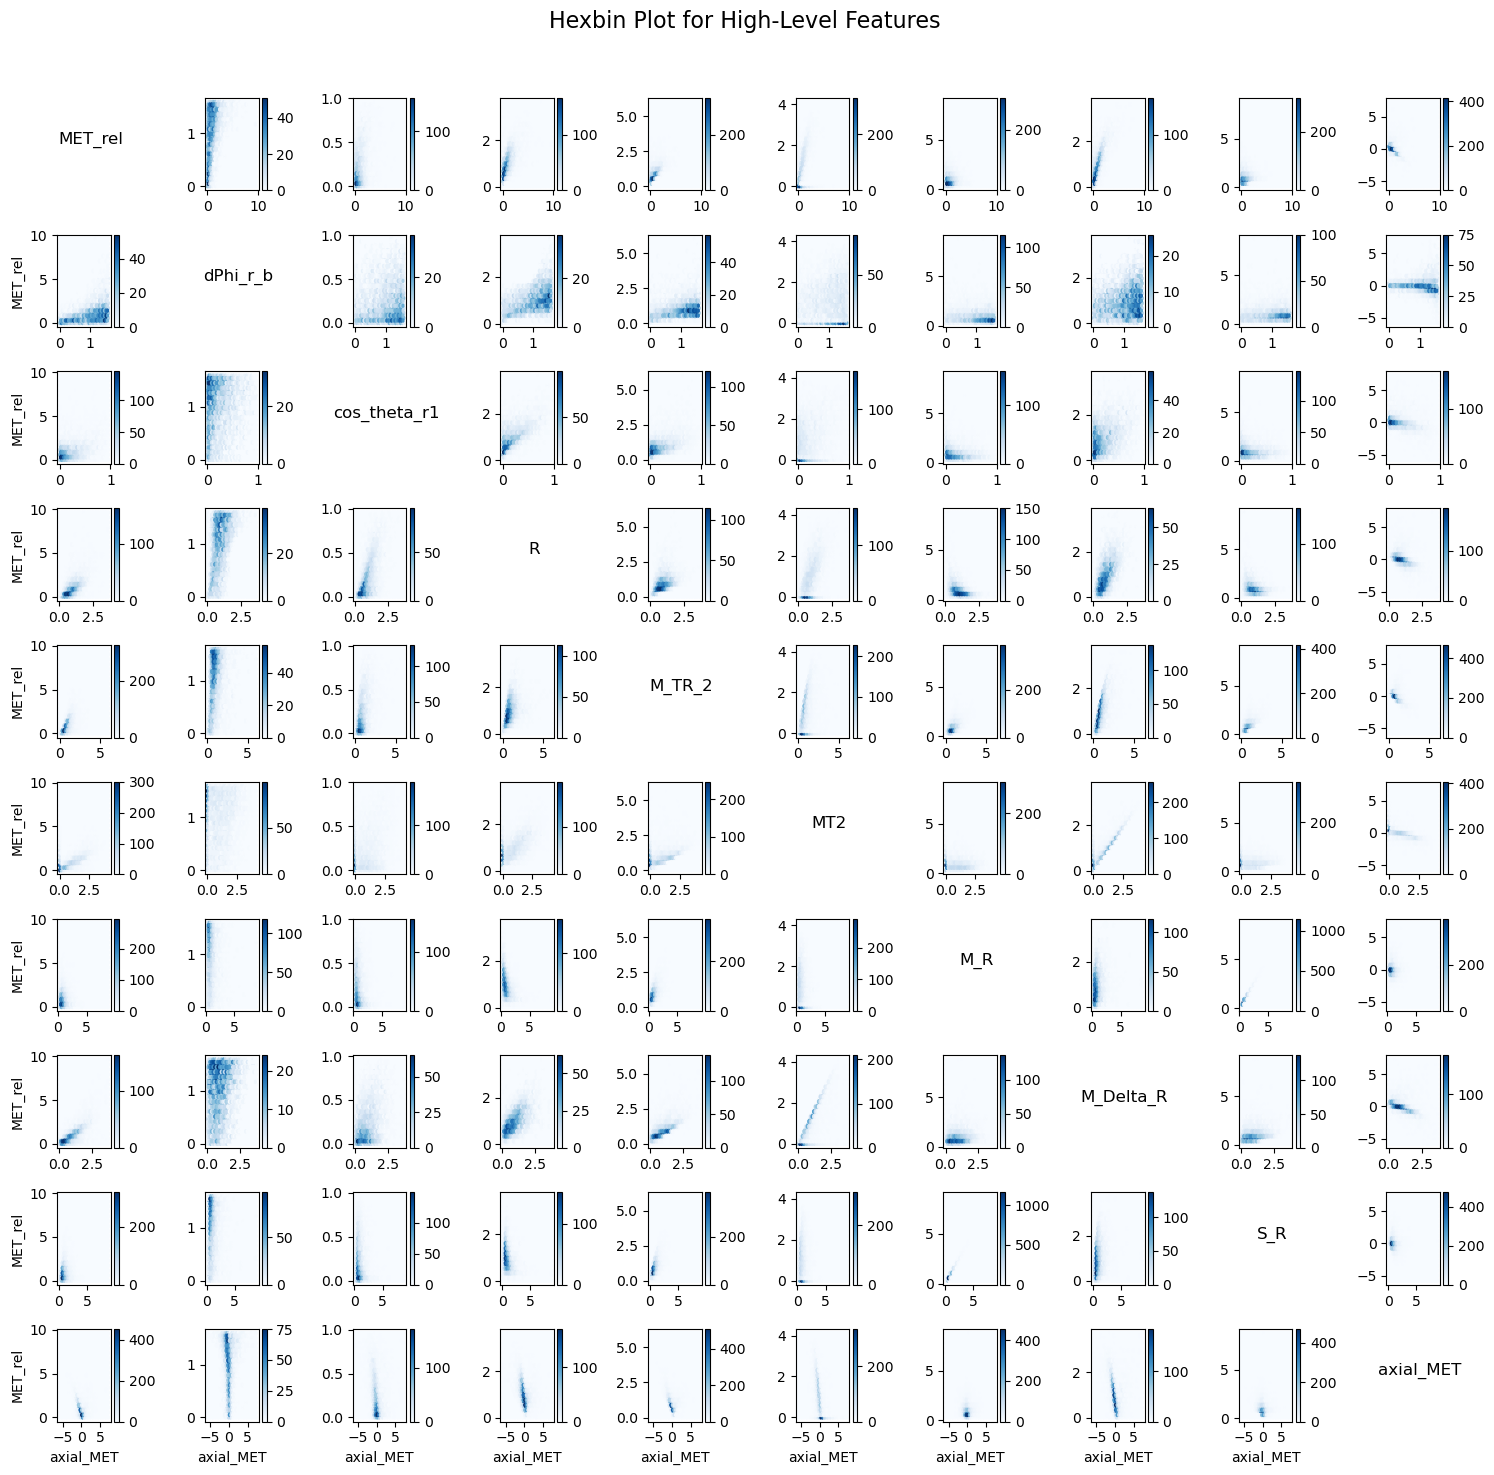

In [12]:
### Part B ###

def pair_plot_with_hexbin(data: pd.DataFrame, feature_names: list, title: str = "Pair Plot", sample_size: int = 5000):
    num_features = len(feature_names)
    fig, axes = plt.subplots(num_features, num_features, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    
    if len(data) > sample_size:
        sampled_data = data.sample(sample_size, random_state=42)
    else:
        sampled_data = data
    
    for i, feature_x in enumerate(feature_names):
        for j, feature_y in enumerate(feature_names):
            ax = axes[i, j]
            
            if i == j:
                ax.text(0.5, 0.5, feature_x, fontsize=12, ha='center')
                ax.axis('off')
            else:
                # Create a hexbin plot instead of scatter
                hb = ax.hexbin(sampled_data[feature_x], sampled_data[feature_y], gridsize=30, cmap='Blues')
                fig.colorbar(hb, ax=ax)  # Add a color bar to indicate density
                
            if j == 0:
                ax.set_ylabel(feature_y)
            if i == num_features - 1:
                ax.set_xlabel(feature_x)
                
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

pair_plot_with_hexbin(susy_df, low_level_features, title="Hexbin Plot for Low-Level Features", sample_size=5000)
pair_plot_with_hexbin(susy_df, high_level_features, title="Hexbin Plot for High-Level Features", sample_size=5000)

In [19]:
### Part C ###
# l_1_pT, MET, MT2, MET_rel, and dPhi_r_b seem to be the best options.

### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate). 

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [14]:
### Part A ###
import tabulate

In [15]:
### Part B ###
import numpy as np
import pandas as pd

low_level_features = ['l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 'MET', 'MET_phi']
high_level_features = ['MET_rel', 'dPhi_r_b', 'cos_theta_r1', 'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET']

# Combines both sets of features.
all_features = low_level_features + high_level_features

# Computes the covariance matrix.
cov_all = np.cov(susy_df[all_features], rowvar=False)

# Compute the correlation matrix.
corr_all = np.corrcoef(susy_df[all_features], rowvar=False)

# Compute covariance matrix for only low-level features.
cov_low = np.cov(susy_df[low_level_features], rowvar=False)

# Compute correlation matrix for only low-level features.
corr_low = np.corrcoef(susy_df[low_level_features], rowvar=False)

# Compute covariance matrix for only high-level features.
cov_high = np.cov(susy_df[high_level_features], rowvar=False)

# Compute correlation matrix for only high-level features.
corr_high = np.corrcoef(susy_df[high_level_features], rowvar=False)

from tabulate import tabulate
print("Covariance Matrix for All Features:")
print(tabulate(cov_all, headers=all_features, tablefmt="grid"))

print("\nCorrelation Matrix for All Features:")
print(tabulate(corr_all, headers=all_features, tablefmt="grid"))

print("\nCovariance Matrix for Low-Level Features:")
print(tabulate(cov_low, headers=low_level_features, tablefmt="grid"))

print("\nCorrelation Matrix for Low-Level Features:")
print(tabulate(corr_low, headers=low_level_features, tablefmt="grid"))

print("\nCovariance Matrix for High-Level Features:")
print(tabulate(cov_high, headers=high_level_features, tablefmt="grid"))

print("\nCorrelation Matrix for High-Level Features:")
print(tabulate(corr_high, headers=high_level_features, tablefmt="grid"))

Covariance Matrix for All Features:
+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+----------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
|       l_1_pT |      l_1_eta |      l_1_phi |       l_2_pT |      l_2_eta |      l_2_phi |          MET |      MET_phi |      MET_rel |     dPhi_r_b |   cos_theta_r1 |            R |       M_TR_2 |          MT2 |          M_R |    M_Delta_R |          S_R |    axial_MET |
+==============+==============+==============+==============+==============+==============+==============+==============+==============+==============+================+==============+==============+==============+==============+==============+==============+==============+
|  0.467482    | -0.000396674 |  7.66214e-05 |  0.305038    | -0.000348827 |  0.000737337 |  0.228434    | -0.000936714 |  0.097524    | -0.04

In [16]:
### Part C ###
from IPython.display import HTML, display

def compute_and_display_matrices(data, feature_set, table_title, cov_decimals=2, corr_decimals=3):
    
    # Compute covariance and correlation matrices
    cov_matrix = np.cov(data[feature_set], rowvar=False)
    corr_matrix = np.corrcoef(data[feature_set], rowvar=False)
    
    # Round matrices to specified decimal places
    cov_matrix_formatted = np.round(cov_matrix, cov_decimals)
    corr_matrix_formatted = np.round(corr_matrix, corr_decimals)
    
    # Generate HTML-formatted tables
    cov_html = tabulate(cov_matrix_formatted, headers=feature_set, tablefmt="html", floatfmt=f".{cov_decimals}f")
    corr_html = tabulate(corr_matrix_formatted, headers=feature_set, tablefmt="html", floatfmt=f".{corr_decimals}f")
    
    # Display HTML tables
    display(HTML(f"<h3>Covariance Matrix for Features: {(table_title)}</h3>"))
    display(HTML(cov_html))
    
    display(HTML(f"<h3>Correlation Matrix for Features: {(table_title)}</h3>"))
    display(HTML(corr_html))

### Part D ###
compute_and_display_matrices(susy_df, all_features, "All features")
compute_and_display_matrices(susy_df, low_level_features, "Low level features")
compute_and_display_matrices(susy_df, high_level_features, "High level features")

Hint: Example code for embedding a `tabulate` table into a notebook:

In [15]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal: 

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable. 

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where 

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [17]:
### Exercise 5.1 ###
import matplotlib.pyplot as plt

def plot_signal_background_distribution(data, observable, signal_mask, background_mask):

    plt.hist(data[observable][signal_mask], bins=50, alpha=0.5, label='Signal', density=True)
    plt.hist(data[observable][background_mask], bins=50, alpha=0.5, label='Background', density=True)
    plt.xlabel(observable)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Signal and Background Distribution for {observable}")
    plt.show()

def find_optimal_threshold(data, observable, signal_mask, background_mask):

    mu = data[observable][background_mask].mean()
    total_signal = signal_mask.sum()
    total_background = background_mask.sum()
    
    # Compute range of x_c calues to examine.
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    
    # Store best x_c values for each selectrion criteria.
    results = {'x > x_c': (0, 0), 'x < x_c': (0, 0), '|x - mu| > x_c': (0, 0), '|x - mu| < x_c': (0, 0)}
    
    for x_c in x_values:
        # Selectrion Criterion 1: x > x_c
        signal_pass = np.sum(signal_mask & (data[observable] > x_c))
        background_pass = np.sum(background_mask & (data[observable] > x_c))
        
        # Calculate metrics
        signal_efficiency = signal_pass / total_signal if total_signal > 0 else 0
        background_rejection = 1 - (background_pass / total_background) if total_background > 0 else 1
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        
        # Update results if this threshold improves separation (e.g., maximize purity)
        if signal_purity > results['x > x_c'][1]:
            results['x > x_c'] = (x_c, signal_purity)
        
        # Repeat for other criteria
        signal_pass = np.sum(signal_mask & (data[observable] < x_c))
        background_pass = np.sum(background_mask & (data[observable] < x_c))
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        if signal_purity > results['x < x_c'][1]:
            results['x < x_c'] = (x_c, signal_purity)
        
        signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) > x_c))
        background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) > x_c))
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        if signal_purity > results['|x - mu| > x_c'][1]:
            results['|x - mu| > x_c'] = (x_c, signal_purity)
        
        signal_pass = np.sum(signal_mask & (np.abs(data[observable] - mu) < x_c))
        background_pass = np.sum(background_mask & (np.abs(data[observable] - mu) < x_c))
        signal_purity = signal_pass / (signal_pass + background_pass) if (signal_pass + background_pass) > 0 else 0
        if signal_purity > results['|x - mu| < x_c'][1]:
            results['|x - mu| < x_c'] = (x_c, signal_purity)
    
    return results
    
def format_results(results, decimals=3):
    formatted_results = {}
    for criterion, (threshold, metric) in results.items():
        formatted_results[criterion] = (round(float(threshold), decimals), round(float(metric), decimals))
    return formatted_results  


def automate_analysis(data, observables, label_column='signal'):
    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    optimal_thresholds_all = {}
    
    for observable in observables:
        print(f"Analyzing {observable}...")
        
        # Attempt to find optimal thresholds.
        thresholds = find_optimal_threshold(data, observable, signal_mask, background_mask)
        formatted_thresholds = format_results(thresholds)
        optimal_thresholds_all[observable] = formatted_thresholds
    
    return optimal_thresholds_all

# Define the list of observable variables.
observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

# Perform the analysis to find optimal thresholds.
optimal_thresholds = automate_analysis(susy_df, observables, label_column='signal')
from pprint import pprint
pprint(optimal_thresholds)

Analyzing l_1_pT...
Analyzing l_1_eta...
Analyzing l_1_phi...
Analyzing l_2_pT...
Analyzing l_2_eta...
Analyzing l_2_phi...
Analyzing MET...
Analyzing MET_phi...
Analyzing MET_rel...
Analyzing dPhi_r_b...
Analyzing cos_theta_r1...
Analyzing R...
Analyzing M_TR_2...
Analyzing MT2...
Analyzing M_R...
Analyzing M_Delta_R...
Analyzing S_R...
Analyzing axial_MET...
{'MET': {'x < x_c': (14.643, 0.458),
         'x > x_c': (7.58, 1.0),
         '|x - mu| < x_c': (16.538, 0.458),
         '|x - mu| > x_c': (6.891, 1.0)},
 'MET_phi': {'x < x_c': (-1.692, 0.462),
             'x > x_c': (1.706, 0.467),
             '|x - mu| < x_c': (0.269, 0.46),
             '|x - mu| > x_c': (1.706, 0.467)},
 'MET_rel': {'x < x_c': (15.549, 0.458),
             'x > x_c': (7.969, 1.0),
             '|x - mu| < x_c': (18.659, 0.458),
             '|x - mu| > x_c': (7.192, 1.0)},
 'MT2': {'x < x_c': (0.129, 0.545),
         'x > x_c': (4.135, 1.0),
         '|x - mu| < x_c': (11.887, 0.458),
         '|x - mu| 

Generating TPR and FPR plots for l_1_pT...


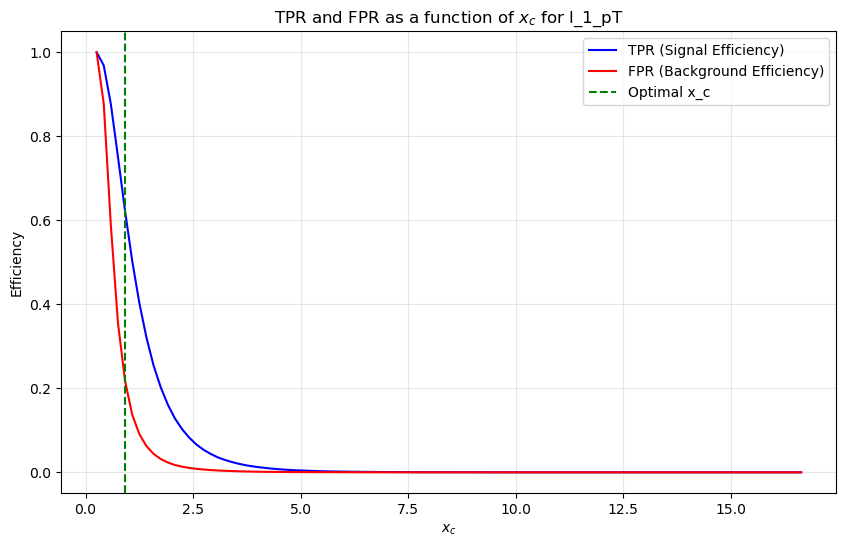

Generating TPR and FPR plots for l_1_eta...


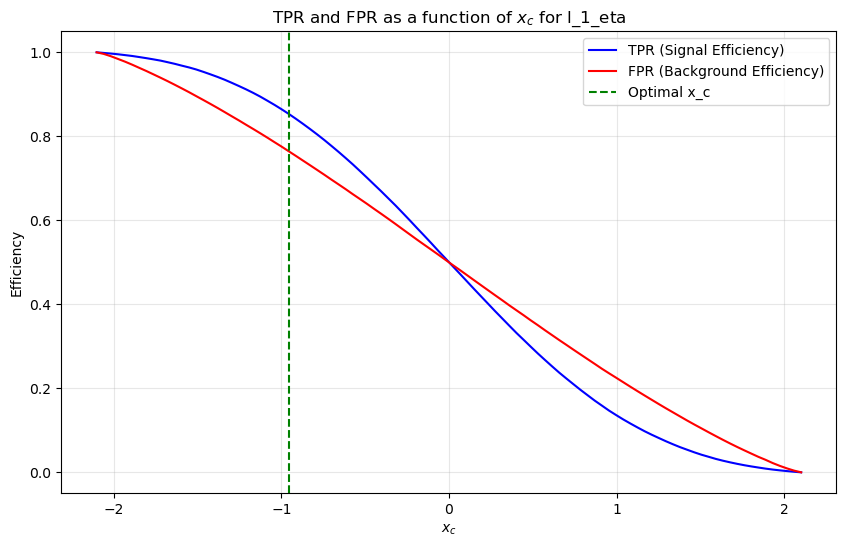

Generating TPR and FPR plots for l_1_phi...


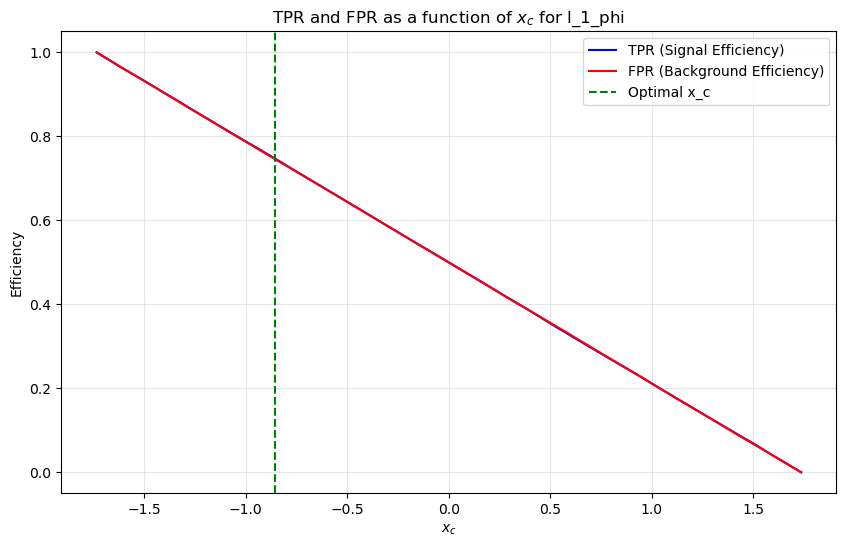

Generating TPR and FPR plots for l_2_pT...


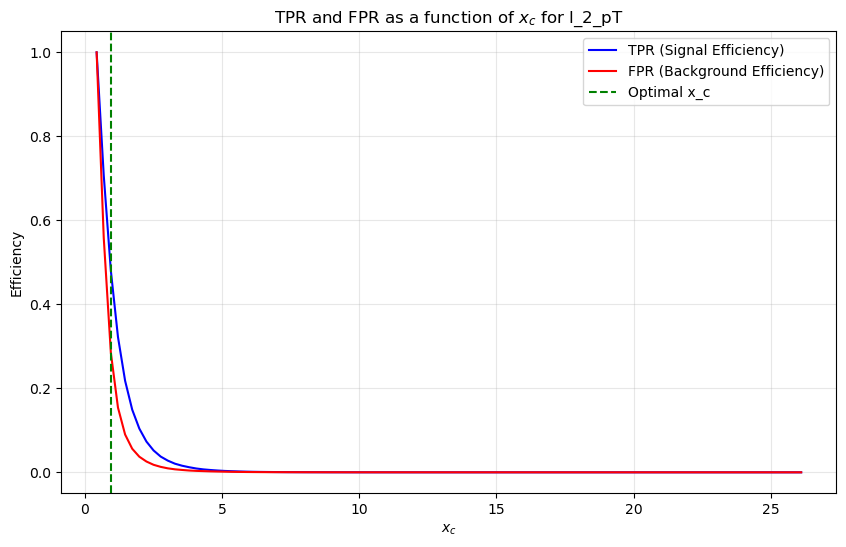

Generating TPR and FPR plots for l_2_eta...


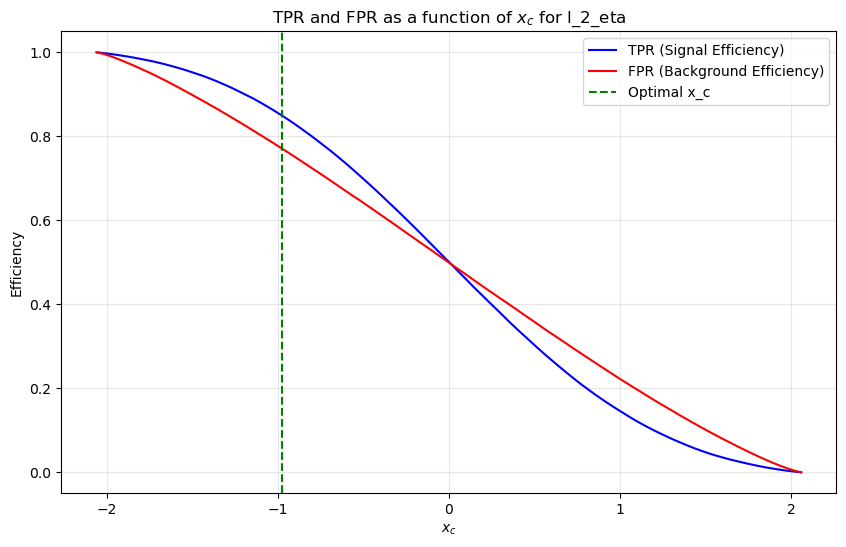

Generating TPR and FPR plots for l_2_phi...


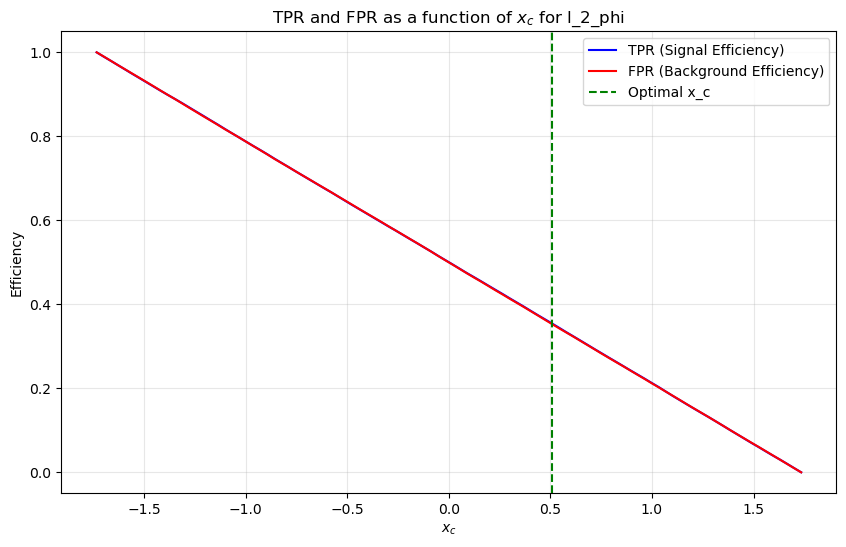

Generating TPR and FPR plots for MET...


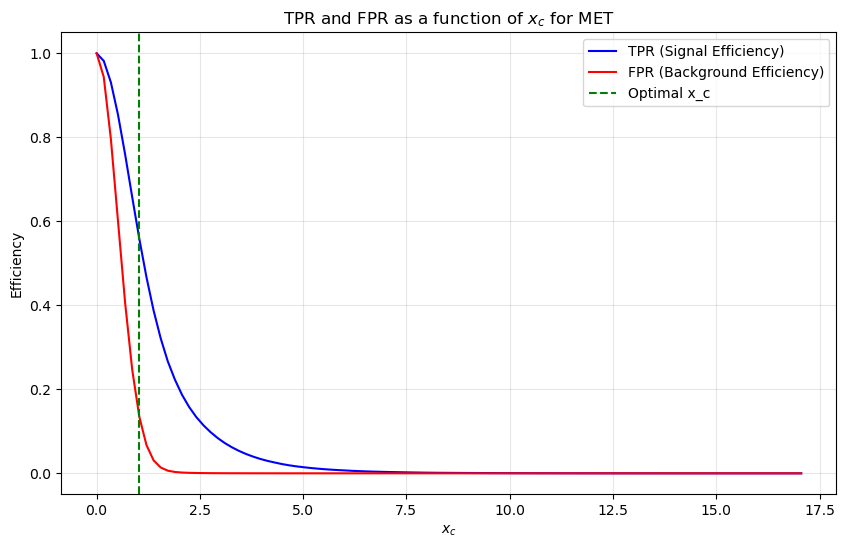

Generating TPR and FPR plots for MET_phi...


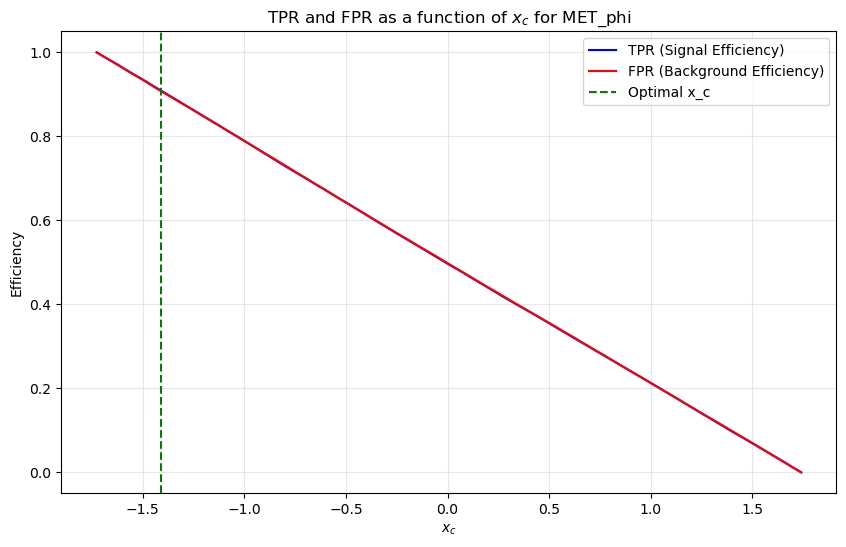

Generating TPR and FPR plots for MET_rel...


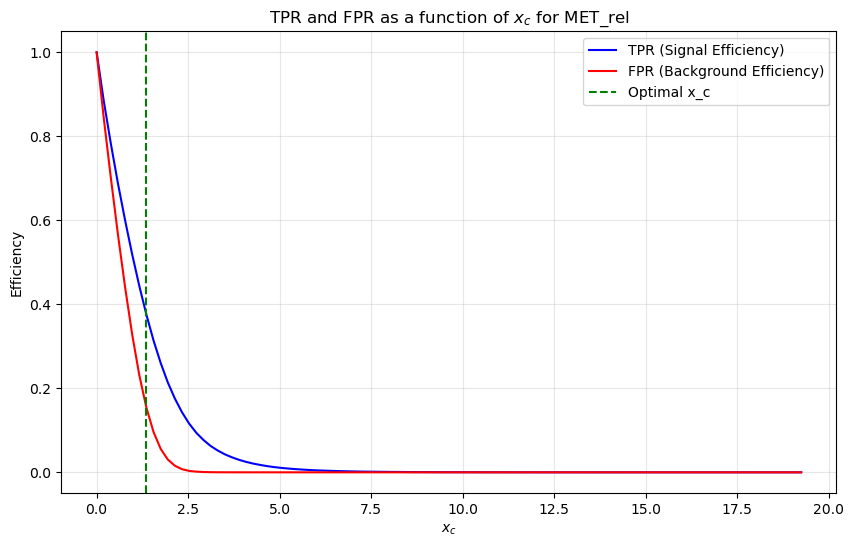

Generating TPR and FPR plots for dPhi_r_b...


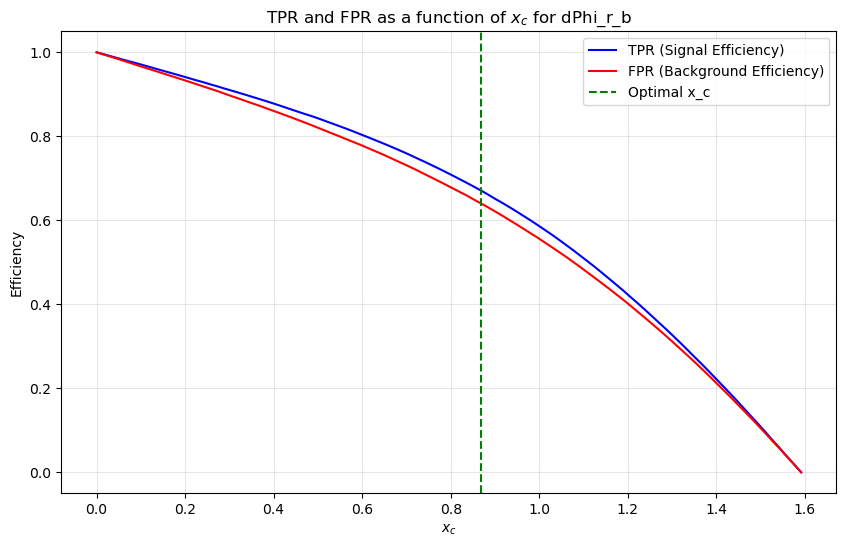

Generating TPR and FPR plots for cos_theta_r1...


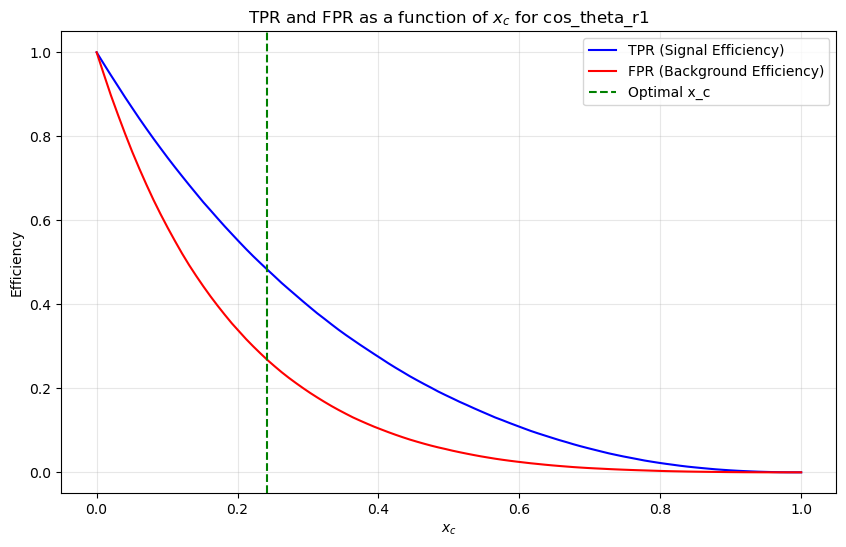

Generating TPR and FPR plots for R...


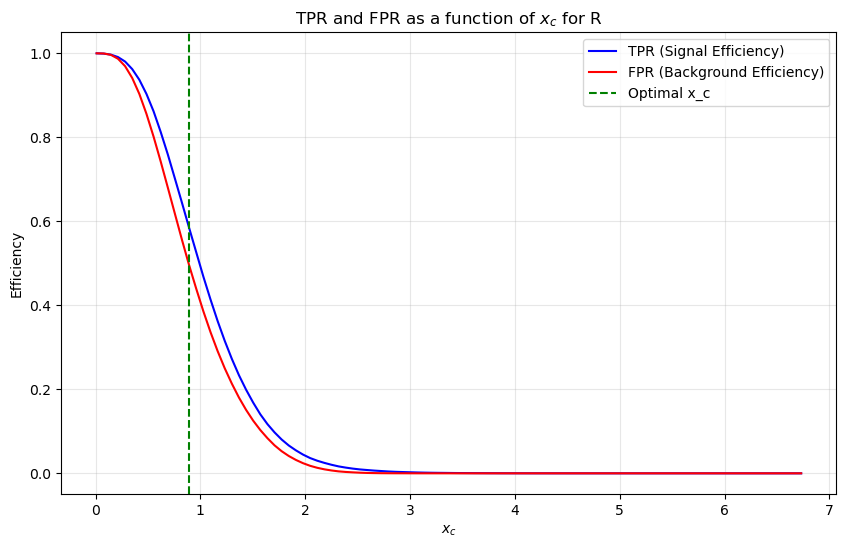

Generating TPR and FPR plots for M_TR_2...


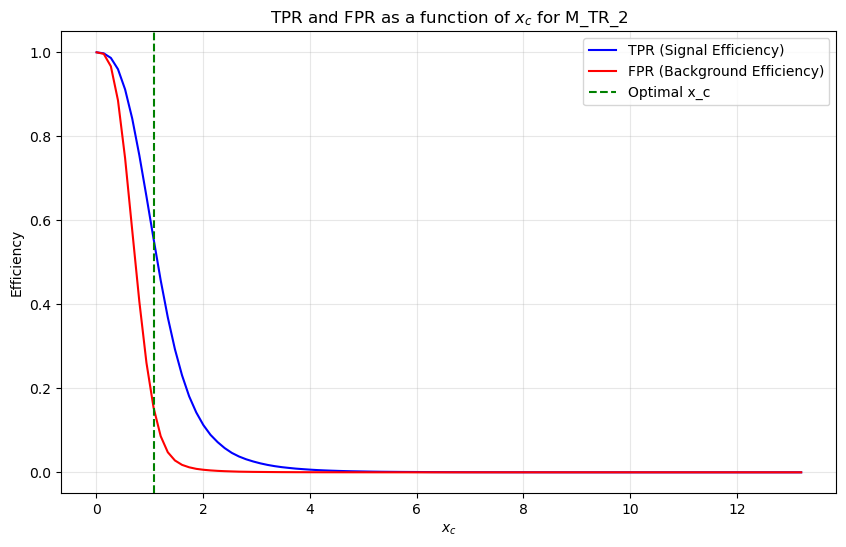

Generating TPR and FPR plots for MT2...


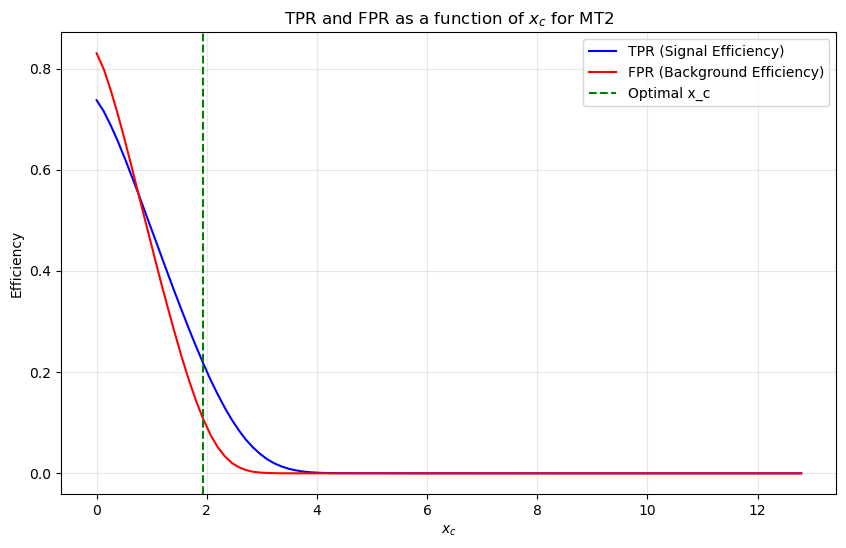

Generating TPR and FPR plots for M_R...


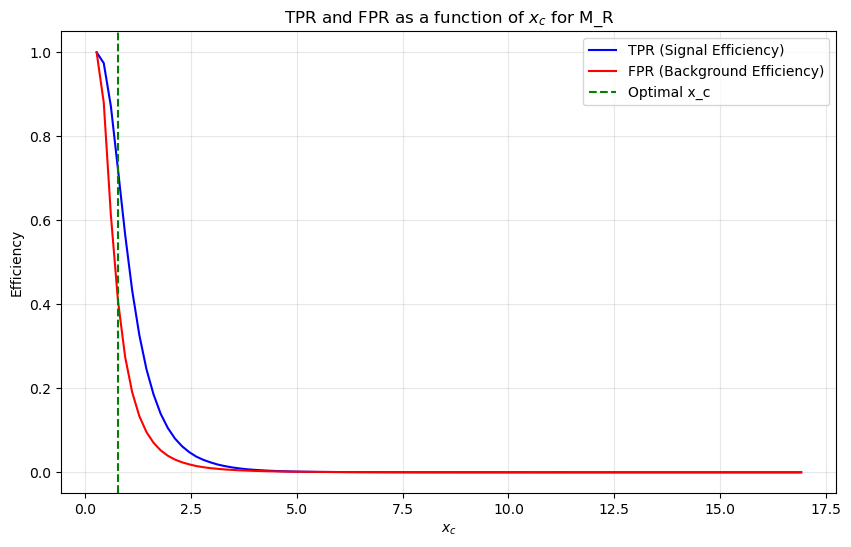

Generating TPR and FPR plots for M_Delta_R...


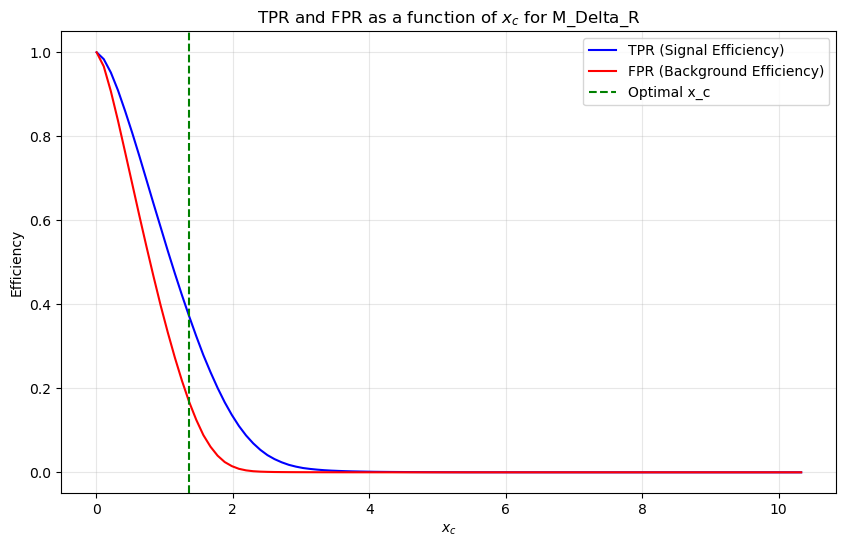

Generating TPR and FPR plots for S_R...


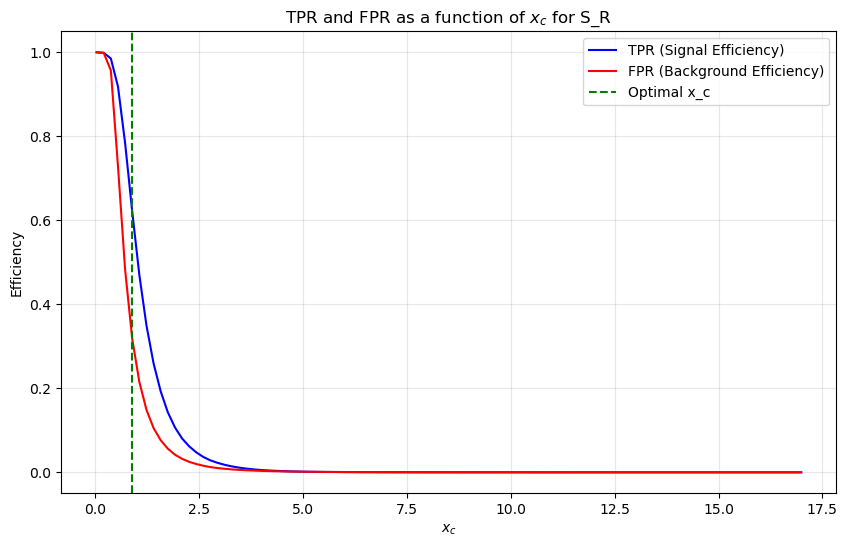

Generating TPR and FPR plots for axial_MET...


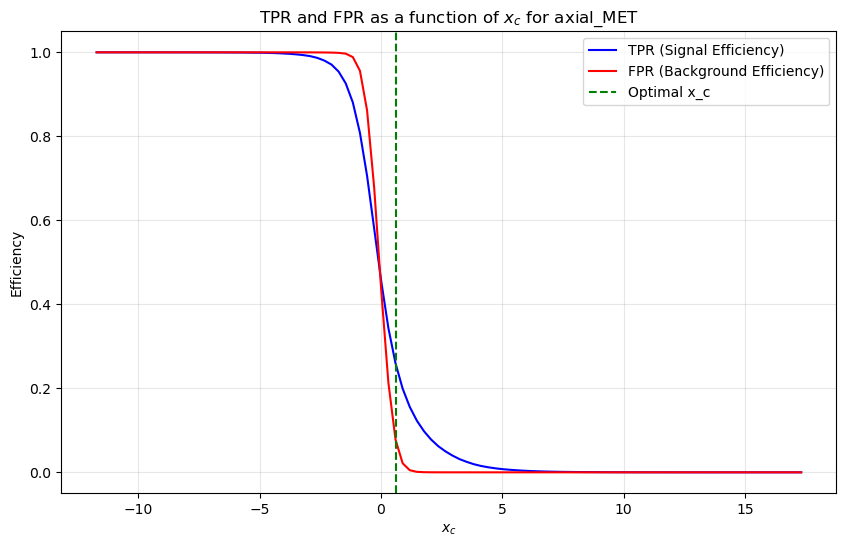

In [18]:
### Exercise 5.2 ###

def plot_tpr_fpr(data, observable, signal_mask, background_mask):
    
    # Calculate the sum of signal and background events
    total_signal = np.sum(signal_mask)
    total_background = np.sum(background_mask)
    
    # Calculate the amount of x_c values to examine.
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    tpr_values = []
    fpr_values = []

    # Calculate TPR and FPR for each x_c
    for x_c in x_values:
        # Signal-passing criteria
        signal_pass = np.sum(signal_mask & (data[observable] > x_c))
        # Background-passing criteria
        background_pass = np.sum(background_mask & (data[observable] > x_c))
        tpr = signal_pass / total_signal if total_signal > 0 else 0
        fpr = background_pass / total_background if total_background > 0 else 0
        tpr_values.append(tpr)
        fpr_values.append(fpr)

    # Create a plot of results.
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, tpr_values, label="TPR (Signal Efficiency)", color="blue")
    plt.plot(x_values, fpr_values, label="FPR (Background Efficiency)", color="red")
    plt.axvline(x=x_values[np.argmax(np.array(tpr_values) - np.array(fpr_values))], color="green", linestyle="--", label="Optimal x_c")
    plt.title(f"TPR and FPR as a function of $x_c$ for {observable}")
    plt.xlabel("$x_c$")
    plt.ylabel("Efficiency")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()

def automate_tpr_fpr(data, observables, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    for observable in observables:
        print(f"Generating TPR and FPR plots for {observable}...")
        plot_tpr_fpr(data, observable, signal_mask, background_mask)

# Definte oberservable traits.
observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

automate_tpr_fpr(susy_df, observables, label_column='signal')

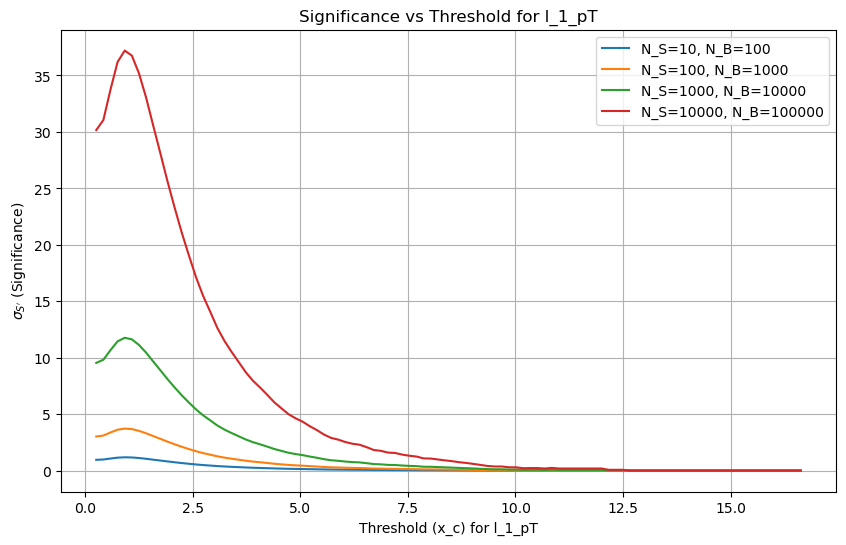

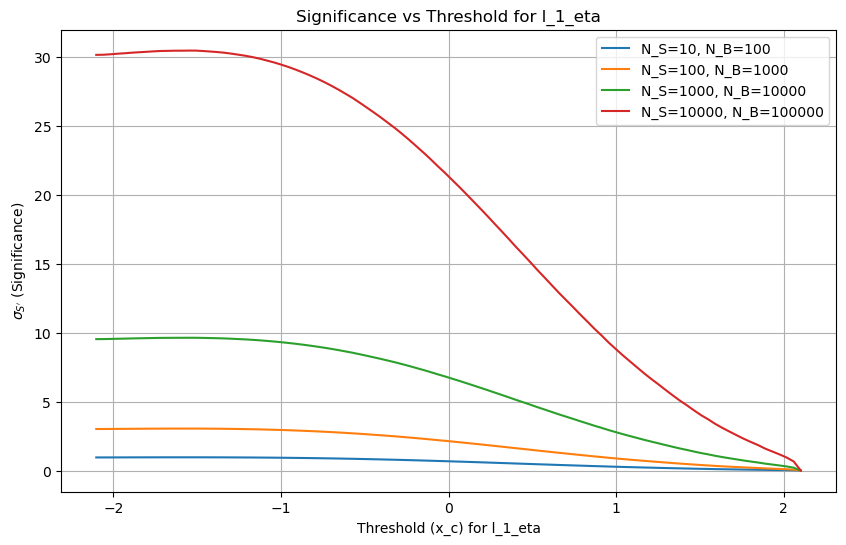

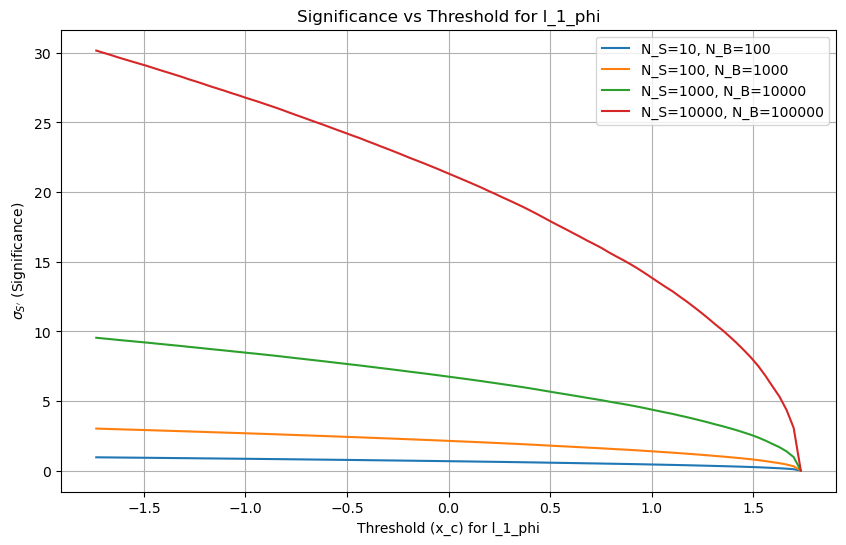

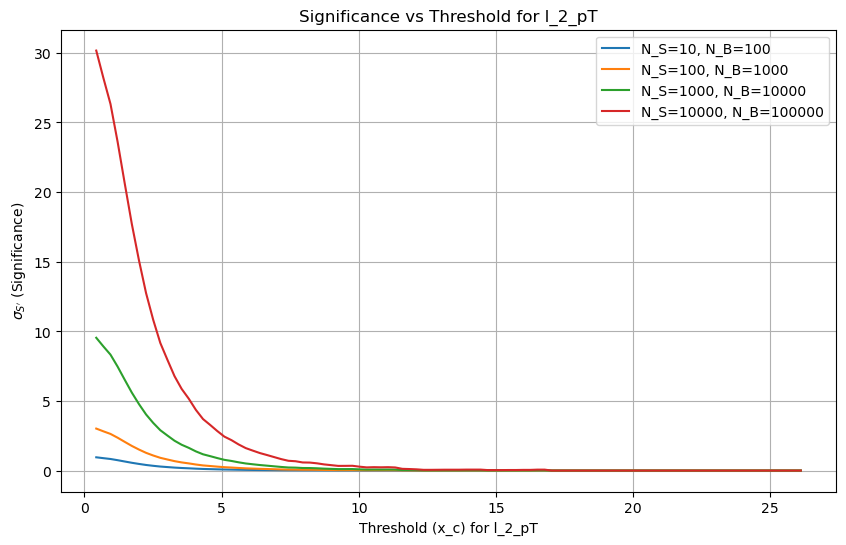

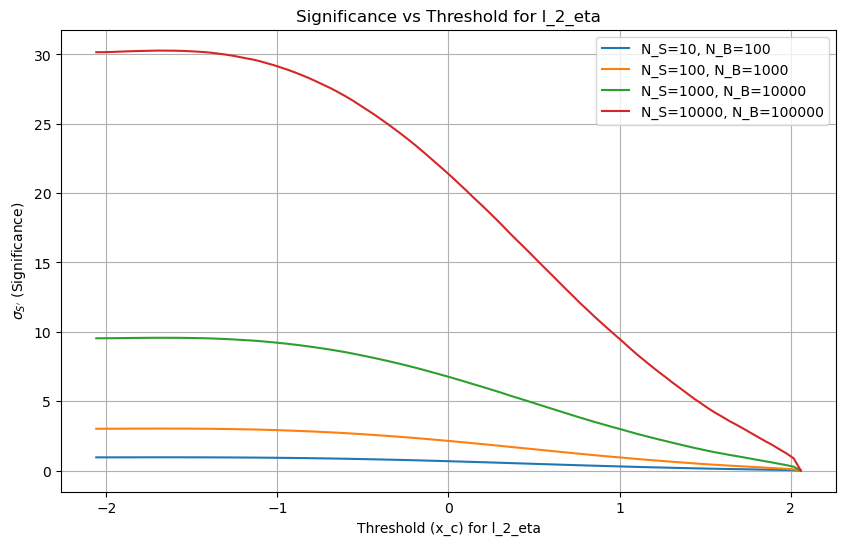

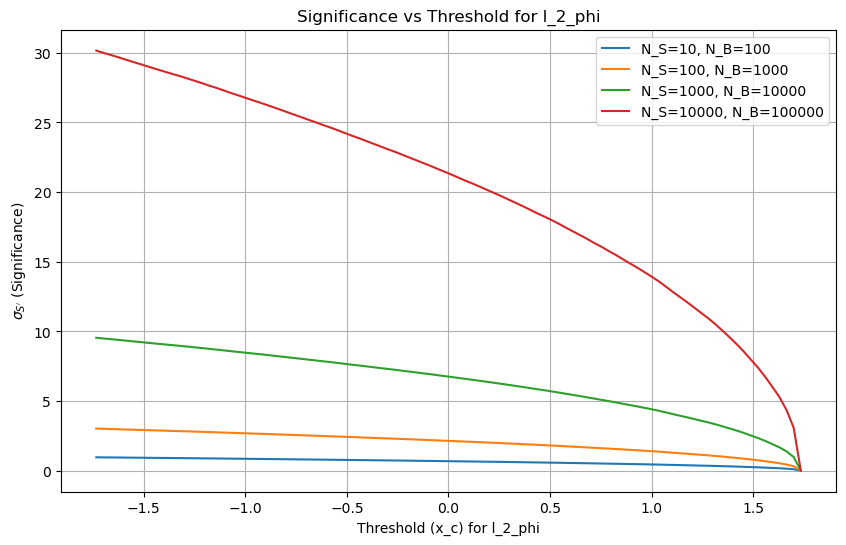

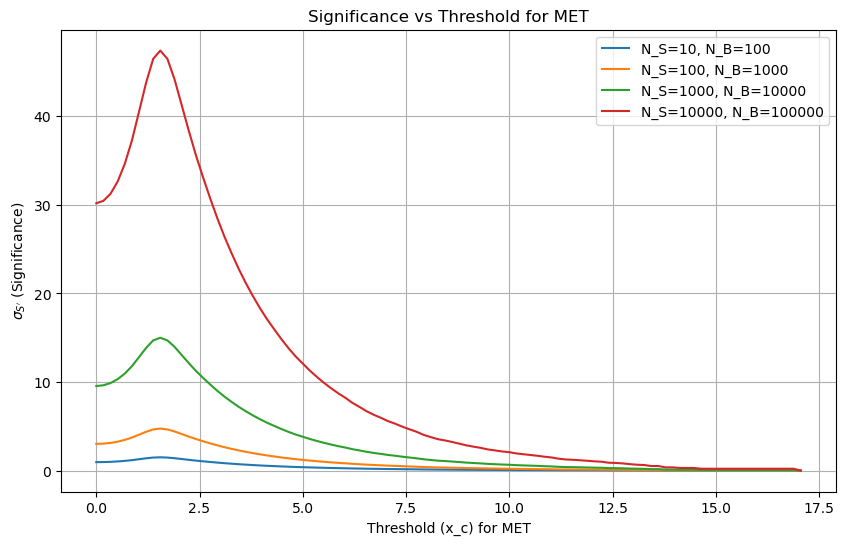

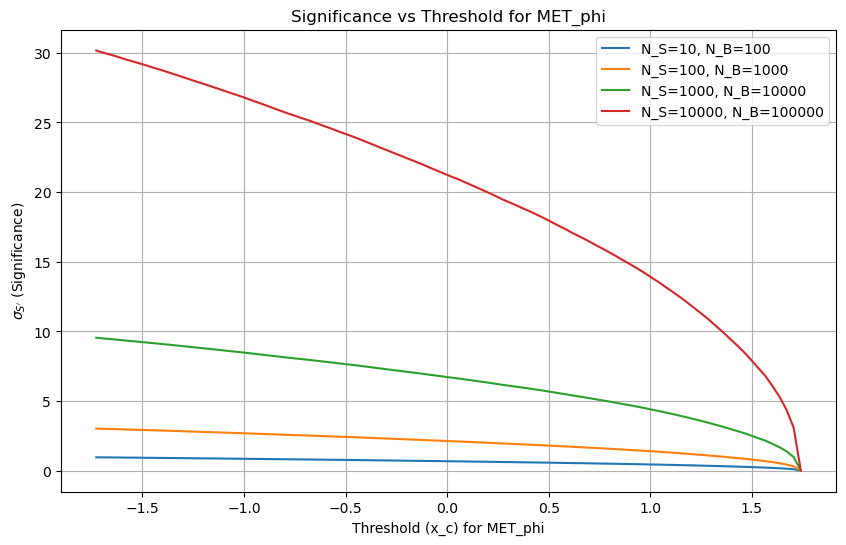

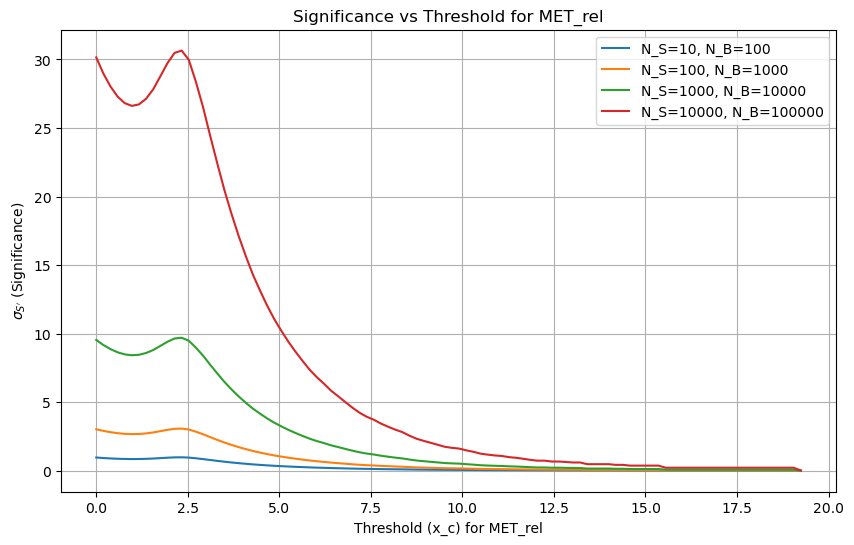

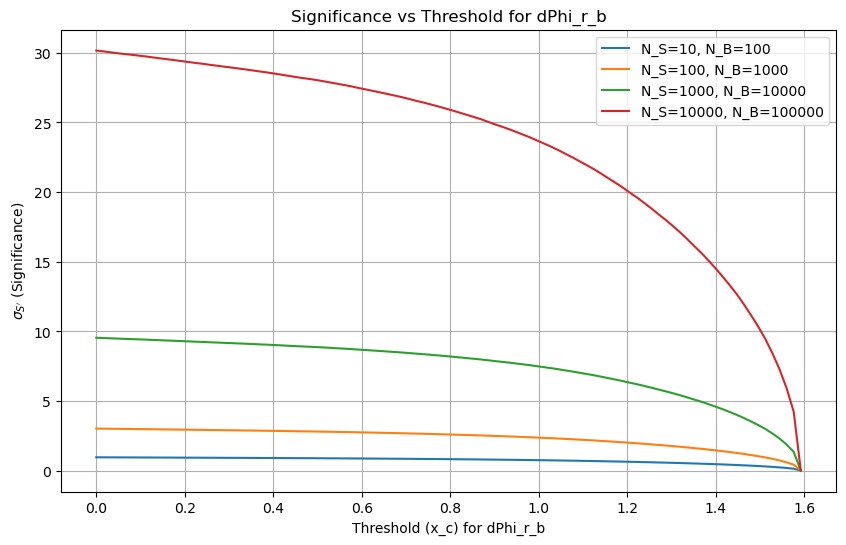

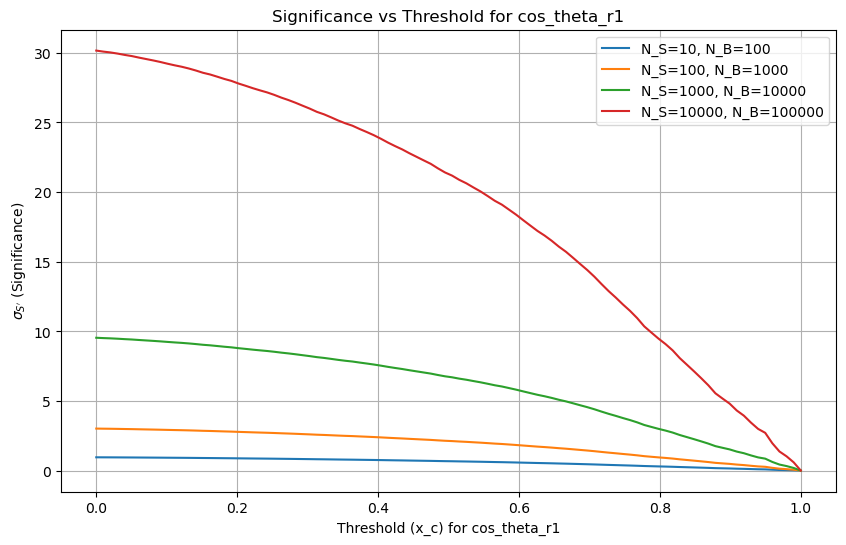

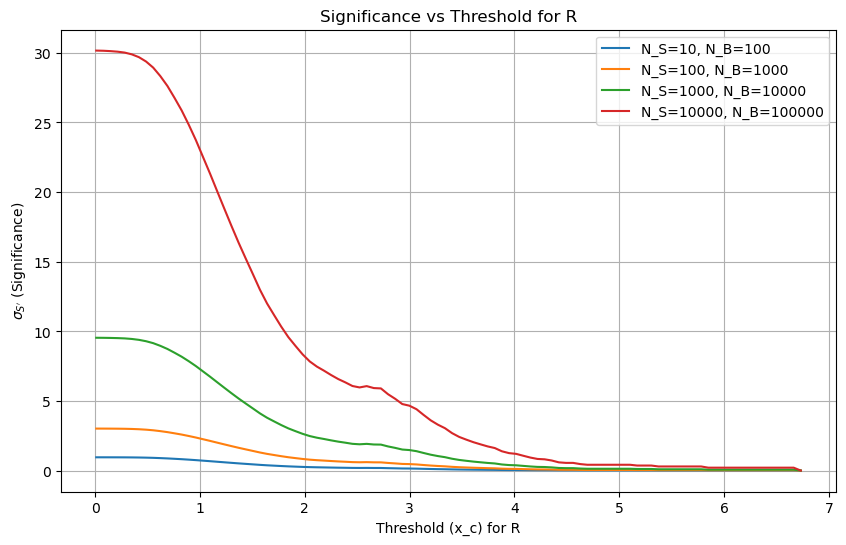

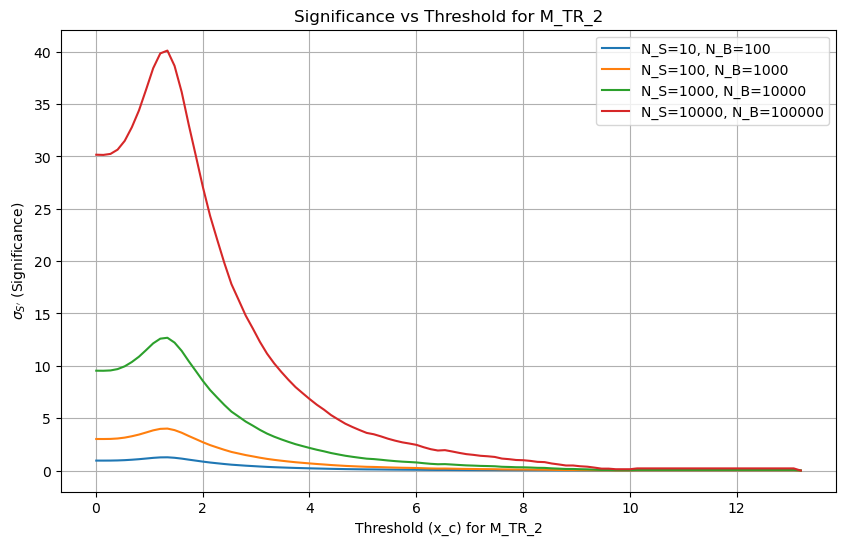

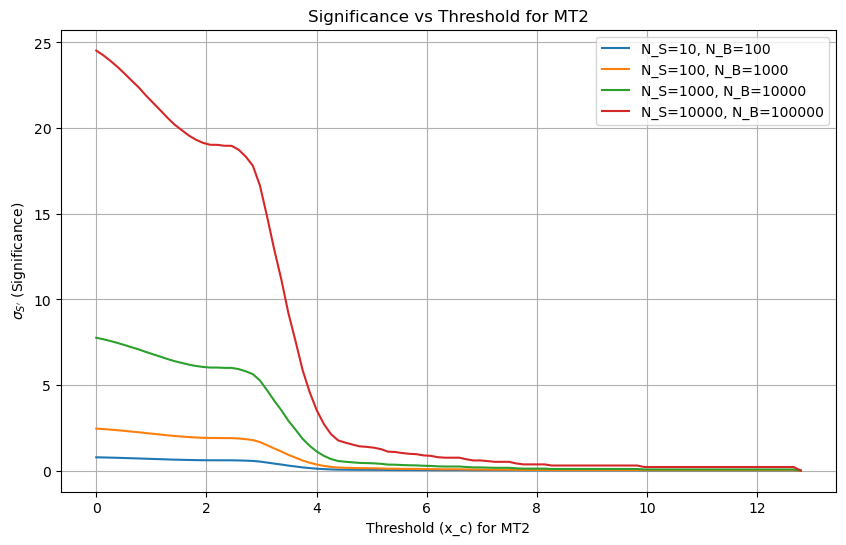

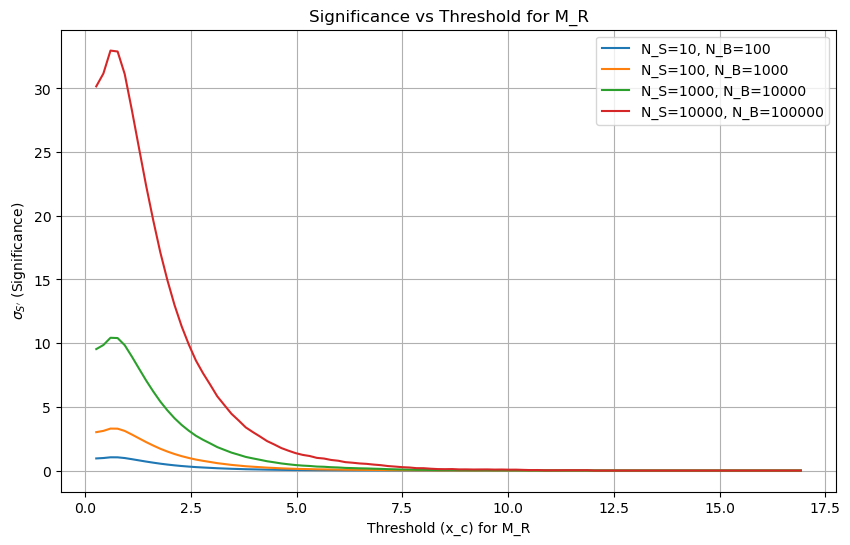

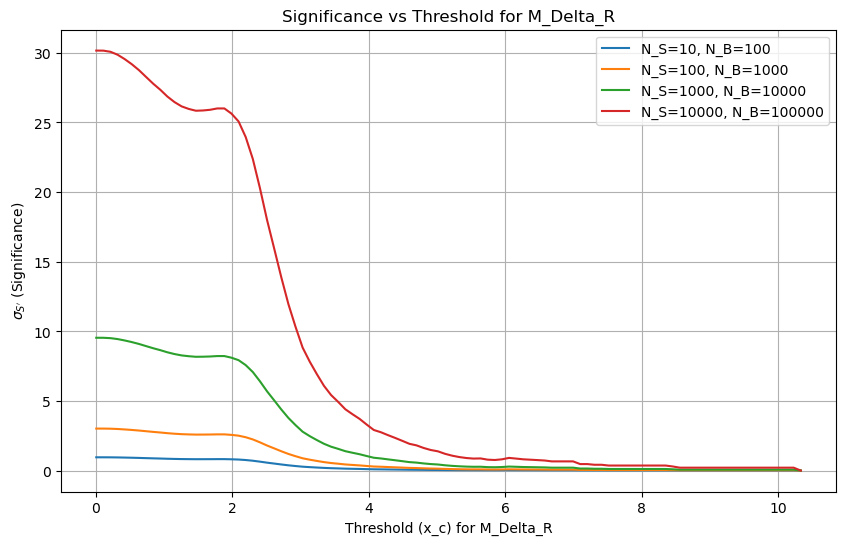

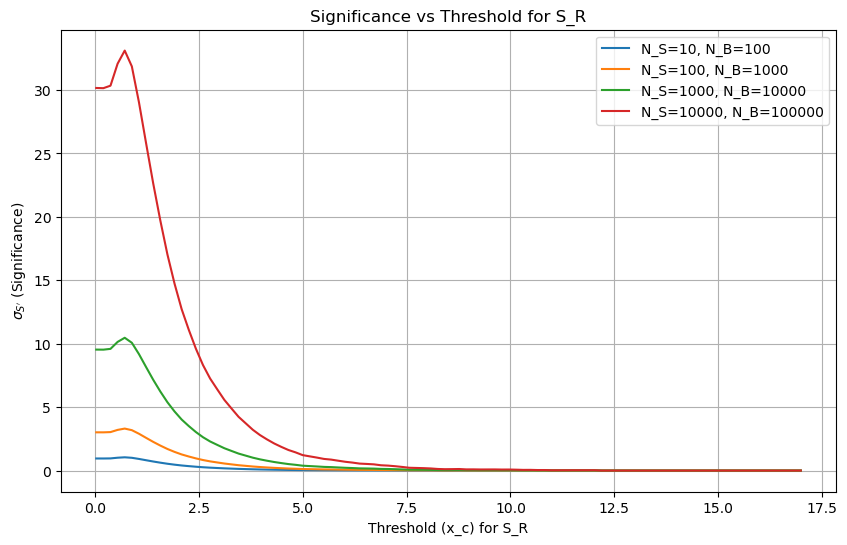

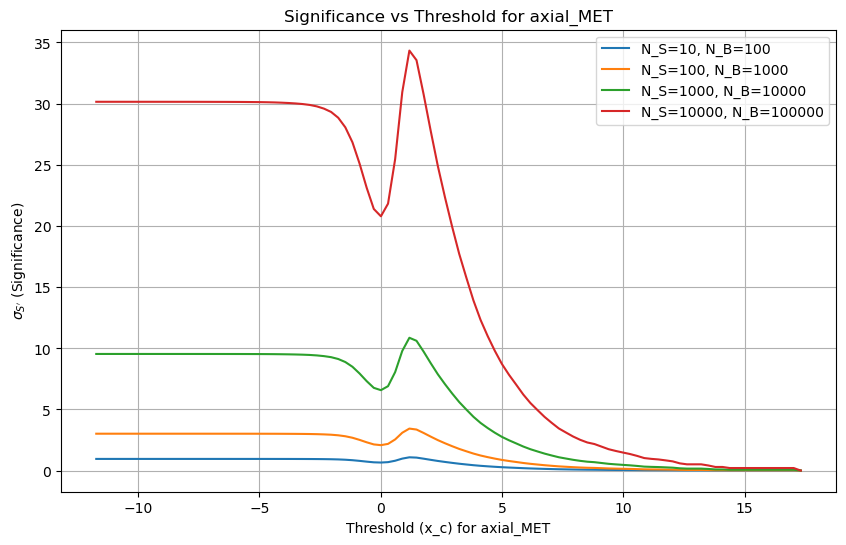

In [19]:
### Exercise 5.3 ###

def calculate_significance(data, observable, signal_mask, background_mask, N_S, N_B):

    total_signal = signal_mask.sum()
    total_background = background_mask.sum()
    
    # Generates observable thresholds for analysis.
    x_values = np.linspace(data[observable].min(), data[observable].max(), 100)
    significance_values = []
    
    # Calculate signal and background efficiencies
    for x_c in x_values:
        epsilon_S = np.sum(signal_mask & (data[observable] > x_c)) / total_signal if total_signal > 0 else 0
        epsilon_B = np.sum(background_mask & (data[observable] > x_c)) / total_background if total_background > 0 else 0
        
        # Calculates N'_S and N'_B
        N_prime_S = epsilon_S * N_S
        N_prime_B = epsilon_B * N_B
        
        # Calculate significance (sigma_S')
        if (N_prime_S + N_prime_B) > 0:
            sigma_S_prime = N_prime_S / np.sqrt(N_prime_S + N_prime_B)
        else:
            sigma_S_prime = 0
        
        significance_values.append(sigma_S_prime)
    
    return x_values, significance_values

# Creates plots for significance for different traits and scenarios.
def plot_significance(data, observables, signal_mask, background_mask, scenarios):

    for observable in observables:
        plt.figure(figsize=(10, 6))
        plt.title(f"Significance vs Threshold for {observable}")
        plt.xlabel(f"Threshold (x_c) for {observable}")
        plt.ylabel(r"$\sigma_{S'}$ (Significance)")
        
        # Calculate and plot the significance for each scenario.
        for N_S, N_B in scenarios:
            x_values, significance_values = calculate_significance(data, observable, signal_mask, background_mask, N_S, N_B)
            plt.plot(x_values, significance_values, label=f"N_S={N_S}, N_B={N_B}")
        
        plt.legend()
        plt.grid(True)
        plt.show()

# Automates the significant plotting for all observables and scenarios.
def automate_significance(data, observables, label_column='signal'):
    """
    Automates the significance plotting for all observables and scenarios.
    """
    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    # Define the scenarios for the number of signal and background events
    scenarios = [
        (10, 100), # N_S=10, N_B=100
        (100, 1000), # N_S=100, N_B=1000
        (1000, 10000), # N_S=1000, N_B=10000
        (10000, 100000) # N_S=10000, N_B=100000
    ]
    
    # Plot significance for all observables and scenarios
    plot_significance(data, observables, signal_mask, background_mask, scenarios)

# Define all observable traits.
observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

automate_significance(susy_df, observables, label_column='signal')

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c). 

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [22]:
### Exercise 6.1 ###

selected_observables = {
    'MET': 21.069,
    'M_Delta_R': 9.465,
    'MET_rel': 8.032
}

### Exercise 6.2 ###
def calculate_cut_flow(data, selected_observables, signal_mask, background_mask, N_S, N_B):
    """
    Calculates the cut-flow table for each scenario.
    """
    # Create an empty table to store results.
    cut_flow_table = []
    
    # Keep track of signal and background passing counts.
    total_signal = signal_mask.sum()
    total_background = background_mask.sum()
    
    # Allow all events pass before making cuts.
    signal_efficiency = 1.0
    background_efficiency = 1.0
    N_prime_S = N_S
    N_prime_B = N_B
    
    # Add the initial row for the table.
    cut_flow_table.append([
        "No cuts", signal_efficiency, background_efficiency, N_prime_S, N_prime_B, 
        N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0
    ])
    
    # Sequentially implement cuts for each observable.
    for observable, threshold in selected_observables.items():
        # Implement cut for current observable.
        signal_pass = np.sum(signal_mask & (data[observable] > threshold))
        background_pass = np.sum(background_mask & (data[observable] > threshold))
        
        # Update new efficiencies.
        signal_efficiency = signal_pass / total_signal if total_signal > 0 else 0
        background_efficiency = background_pass / total_background if total_background > 0 else 0
        
        # Update effective signal and background events.
        N_prime_S = signal_efficiency * N_S
        N_prime_B = background_efficiency * N_B
        
        # Add the row for the current cut.
        cut_flow_table.append([
            f"Cut: {observable} > {threshold}", signal_efficiency, background_efficiency, N_prime_S, N_prime_B, 
            N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0
        ])
    
    return cut_flow_table

# Create new classes to create visuals of new data.
def display_cut_flow_table(cut_flow_table, scenario):

    headers = ["Selection Step", r"epsilon_S", r"epsilon_B", r"N'_S", r"N'_B", r"sigma_{S'}"]
    print(f"Cut-flow table for scenario (N_S={scenario[0]}, N_B={scenario[1]}):")
    print(tabulate(cut_flow_table, headers=headers, floatfmt=".3f", tablefmt="pretty"))
    
def automate_cut_flow(data, selected_observables, scenarios, label_column='signal'):

    signal_mask = data[label_column] == 1
    background_mask = data[label_column] == 0
    
    # Generate and display the cut-flow table for each scenario.
    for scenario in scenarios:
        cut_flow_table = calculate_cut_flow(data, selected_observables, signal_mask, background_mask, scenario[0], scenario[1])
        display_cut_flow_table(cut_flow_table, scenario)

# Define each scenario.
scenarios = [
    (10, 100),   # N_S=10, N_B=100
    (100, 1000), # N_S=100, N_B=1000
    (1000, 10000), # N_S=1000, N_B=10000
    (10000, 100000) # N_S=10000, N_B=100000
]

automate_cut_flow(susy_df, selected_observables, scenarios, label_column='signal')

Cut-flow table for scenario (N_S=10, N_B=100):
+------------------------+-----------------------+-----------+------------------------+------+---------------------+
|     Selection Step     |       epsilon_S       | epsilon_B |          N'_S          | N'_B |     sigma_{S'}      |
+------------------------+-----------------------+-----------+------------------------+------+---------------------+
|        No cuts         |          1.0          |    1.0    |           10           | 100  | 0.9534625892455924  |
|   Cut: MET > 21.069    |          0.0          |    0.0    |          0.0           | 0.0  |          0          |
| Cut: M_Delta_R > 9.465 | 4.362145303060045e-06 |    0.0    | 4.3621453030600455e-05 | 0.0  | 0.00660465389180996 |
|  Cut: MET_rel > 8.032  | 0.0009989312744007504 |    0.0    |  0.009989312744007503  | 0.0  | 0.09994654943522314 |
+------------------------+-----------------------+-----------+------------------------+------+---------------------+
Cut-flow table fo

In [24]:
### Exercise 6.3 ###

def compute_significance(N_S, N_B, epsilon_S, epsilon_B):

    N_prime_S = epsilon_S * N_S
    N_prime_B = epsilon_B * N_B
    return N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0

def optimize_sequential(data, observable_1, observable_2, signal_mask, background_mask, N_S, N_B):

# ATTEMPT 1: Optimize observable_1 first.
    thresholds_1 = find_optimal_threshold(data, observable_1, signal_mask, background_mask)
    threshold_value_1, _ = thresholds_1['x > x_c']  # Example: Use 'x > x_c' for selection

    # Applies selection of other observable based on observable_1.
    selected_mask_1 = signal_mask & (data[observable_1] > threshold_value_1)
    selected_mask_bkg_1 = background_mask & (data[observable_1] > threshold_value_1)

    # Calculate efficiencies for observable_1.
    epsilon_S_1_selected = selected_mask_1.sum() / signal_mask.sum()
    epsilon_B_1_selected = selected_mask_bkg_1.sum() / background_mask.sum()

    # Only optimize observable_2 after selection on observable_1.
    thresholds_2 = find_optimal_threshold(data[selected_mask_1 | selected_mask_bkg_1], observable_2, selected_mask_1, selected_mask_bkg_1)
    threshold_value_2, _ = thresholds_2['x > x_c']  # Example: Use 'x > x_c' for selection

    # Apply new selection based on observable_2.
    selected_mask_2 = selected_mask_1 & (data[observable_2] > threshold_value_2)
    selected_mask_bkg_2 = selected_mask_bkg_1 & (data[observable_2] > threshold_value_2)

    # Calculate efficiencies for observable_2.
    epsilon_S_2_selected = selected_mask_2.sum() / signal_mask.sum()
    epsilon_B_2_selected = selected_mask_bkg_2.sum() / background_mask.sum()

    # Compute significance after applying both selections.
    significance_1_then_2 = compute_significance(N_S, N_B, epsilon_S_2_selected, epsilon_B_2_selected)

# ATTEMPTE 2: Optimize observable_2 first.
    thresholds_2_rev = find_optimal_threshold(data, observable_2, signal_mask, background_mask)
    threshold_value_2_rev, _ = thresholds_2_rev['x > x_c']  # Example: Use 'x > x_c' for selection

    selected_mask_2_rev = signal_mask & (data[observable_2] > threshold_value_2_rev)
    selected_mask_bkg_2_rev = background_mask & (data[observable_2] > threshold_value_2_rev)

    # Calculate efficiencies for observable_2.
    epsilon_S_2_rev_selected = selected_mask_2_rev.sum() / signal_mask.sum()
    epsilon_B_2_rev_selected = selected_mask_bkg_2_rev.sum() / background_mask.sum()

    # Optimize observable_1 after selection on observable_2.
    thresholds_1_rev = find_optimal_threshold(data[selected_mask_2_rev | selected_mask_bkg_2_rev], observable_1, selected_mask_2_rev, selected_mask_bkg_2_rev)
    threshold_value_1_rev, _ = thresholds_1_rev['x > x_c']  # Example: Use 'x > x_c' for selection

    selected_mask_1_rev = selected_mask_2_rev & (data[observable_1] > threshold_value_1_rev)
    selected_mask_bkg_1_rev = selected_mask_bkg_2_rev & (data[observable_1] > threshold_value_1_rev)

    # Calculate new efficiencies for observable_1.
    epsilon_S_1_rev_selected = selected_mask_1_rev.sum() / signal_mask.sum()
    epsilon_B_1_rev_selected = selected_mask_bkg_1_rev.sum() / background_mask.sum()

    # Compute significance for the reversed order in attempt 2.
    significance_2_then_1 = compute_significance(N_S, N_B, epsilon_S_1_rev_selected, epsilon_B_1_rev_selected)

    # Return both significant values to compare.
    return significance_1_then_2, significance_2_then_1


observable_1 = 'MET'
observable_2 = 'l_1_pT'     
signal_mask = susy_df['signal'] == 1  
background_mask = susy_df['signal'] == 0  
N_S = 1000  
N_B = 10000  

# Compute significance with both orders of selection.
sig_1_then_2, sig_2_then_1 = optimize_sequential(susy_df, observable_1, observable_2, signal_mask, background_mask, N_S, N_B)

print(f"Significance (Observable 1 first, then Observable 2): {sig_1_then_2}")
print(f"Significance (Observable 2 first, then Observable 1): {sig_2_then_1}")

# Question Answer: The significance decreases if MET is second instead of first.

Significance (Observable 1 first, then Observable 2): 1.4724083046563008
Significance (Observable 2 first, then Observable 1): 0.5833072377732712


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



In [28]:
import sklearn

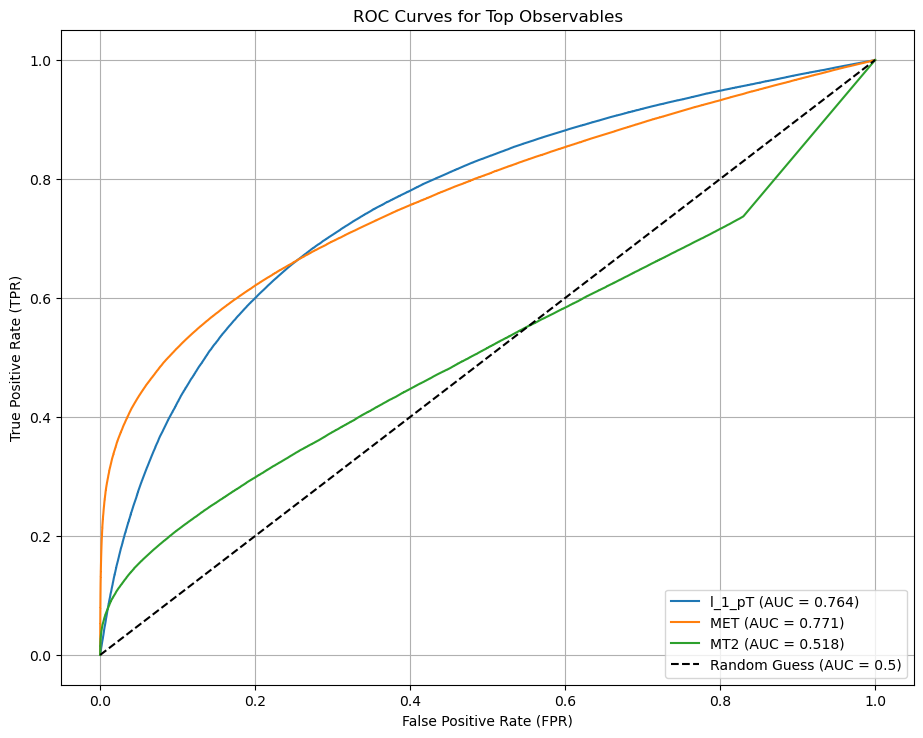

In [31]:
### Exercise 7.1 ###
from sklearn.metrics import roc_curve, auc

# Create function to create
def plot_roc_curves(data, observables, signal_mask, background_mask):

    plt.figure(figsize=(11, 8.5))

    # Combines signal and background data into one array.
    for observable in observables:
        labels = signal_mask.astype(int)
        scores = data[observable]
        
        # Compute ROC curve and AUC.
        fpr, tpr, _ = roc_curve(labels, scores)
        roc_auc = auc(fpr, tpr)
        
        # Plot ROC curve.
        plt.plot(fpr, tpr, label=f"{observable} (AUC = {roc_auc:.3f})")
    
    # Plot settings
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves for Top Observables")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

top_observables = ['l_1_pT', 'MET', 'MT2']

signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

plot_roc_curves(susy_df, top_observables, signal_mask, background_mask)

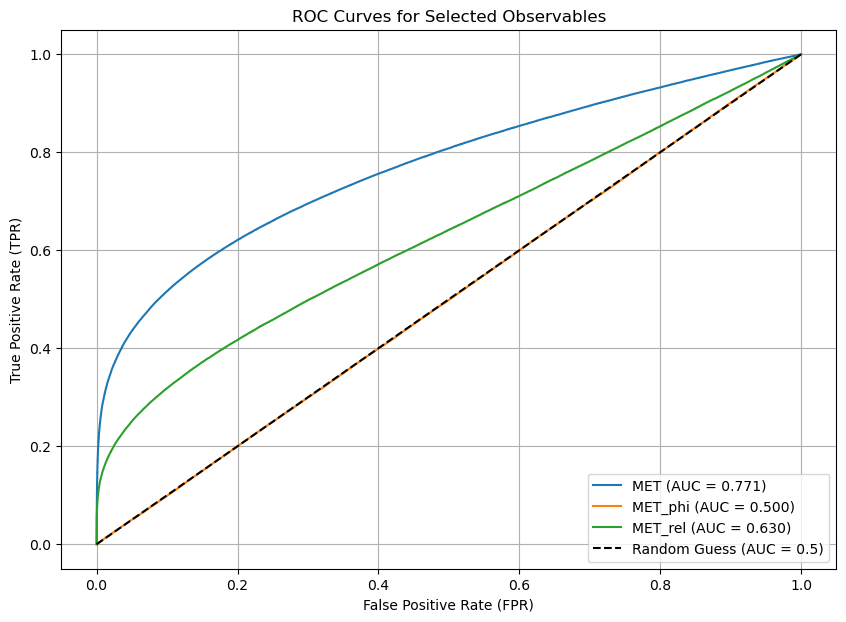

In [35]:
### Exercise 7.2 ###

def plot_roc_for_observables(data, observables, signal_mask, background_mask, title="ROC Curves", save_path=None):

    plt.figure(figsize=(10, 7))
    
    for observable in observables:
        labels = signal_mask.astype(int)
        scores = data[observable]
        
        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(labels, scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{observable} (AUC = {roc_auc:.3f})")
    
    
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()
    
    if save_path:
        plt.savefig(save_path)
    
    plt.show()

observables_to_test = ['MET', 'MET_phi', 'MET_rel']
signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

plot_roc_for_observables(
    susy_df, 
    observables_to_test, 
    signal_mask, 
    background_mask, 
    title="ROC Curves for Selected Observables"
)

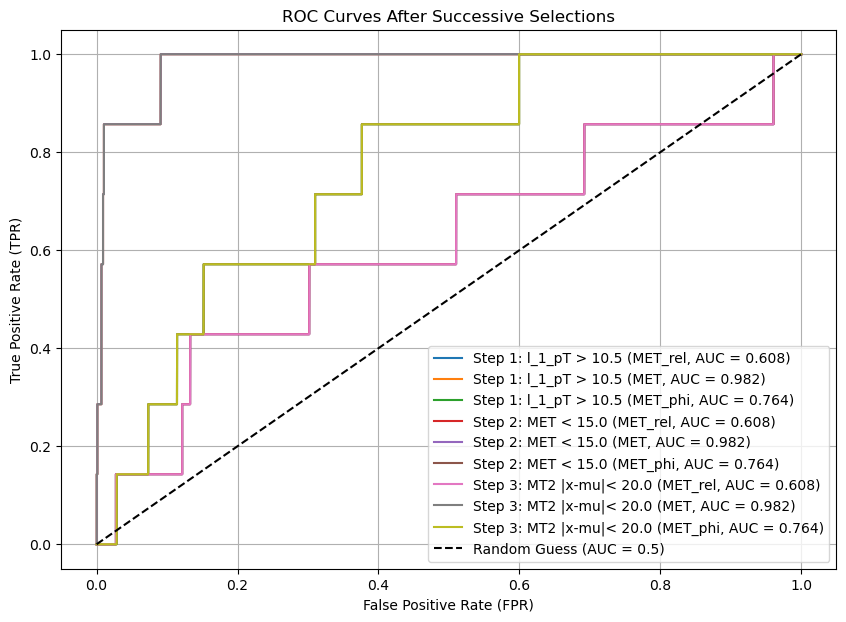

In [37]:
### Execise 7.3 ###
def plot_roc_after_selections(data, observables, selections, signal_mask, background_mask, title="ROC Curves After Successive Selections", save_path=None):

    plt.figure(figsize=(10, 7))
    
    # Define signal and background masks from previous code.
    current_signal_mask = signal_mask.copy()
    current_background_mask = background_mask.copy()
    
    # Apply all coniditons.
    for i, (observable, threshold, condition) in enumerate(selections):
        if condition == '>':
            current_signal_mask &= data[observable] > threshold
            current_background_mask &= data[observable] > threshold
        elif condition == '<':
            current_signal_mask &= data[observable] < threshold
            current_background_mask &= data[observable] < threshold
        elif condition == '|x-mu|>':
            mu = data[observable][background_mask].mean()
            current_signal_mask &= np.abs(data[observable] - mu) > threshold
            current_background_mask &= np.abs(data[observable] - mu) > threshold
        elif condition == '|x-mu|<':
            mu = data[observable][background_mask].mean()
            current_signal_mask &= np.abs(data[observable] - mu) < threshold
            current_background_mask &= np.abs(data[observable] - mu) < threshold
        else:
            raise ValueError(f"Unsupported condition: {condition}")
        
        # Compute ROC curves for observables
        for obs in observables:
            labels = current_signal_mask.astype(int) + current_background_mask.astype(int)
            scores = data[obs]
            
            # Compute and plot ROC curve and AUC
            fpr, tpr, _ = roc_curve(labels, scores)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Step {i+1}: {observable} {condition} {threshold} ({obs}, AUC = {roc_auc:.3f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()
    
    if save_path:
        plt.savefig(save_path)
    
    plt.show()

successive_selections = [
    ('l_1_pT', 10.5, '>'),
    ('MET', 15.0, '<'),
    ('MT2', 20.0, '|x-mu|<')
]

observables_to_compare = ['MET_rel', 'MET', 'MET_phi']

signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

# Activate the function.
plot_roc_after_selections(
    susy_df, 
    observables_to_compare, 
    successive_selections, 
    signal_mask, 
    background_mask, 
    title="ROC Curves After Successive Selections"
)

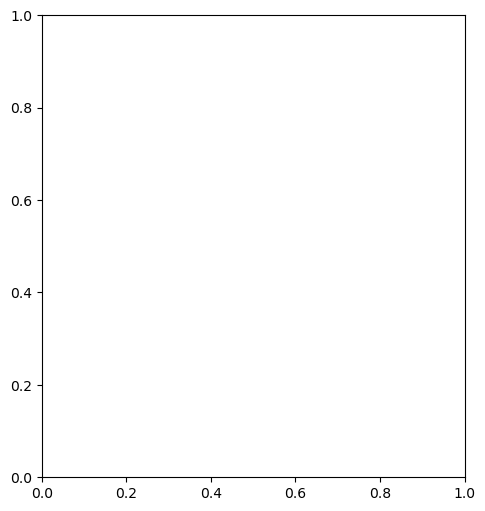

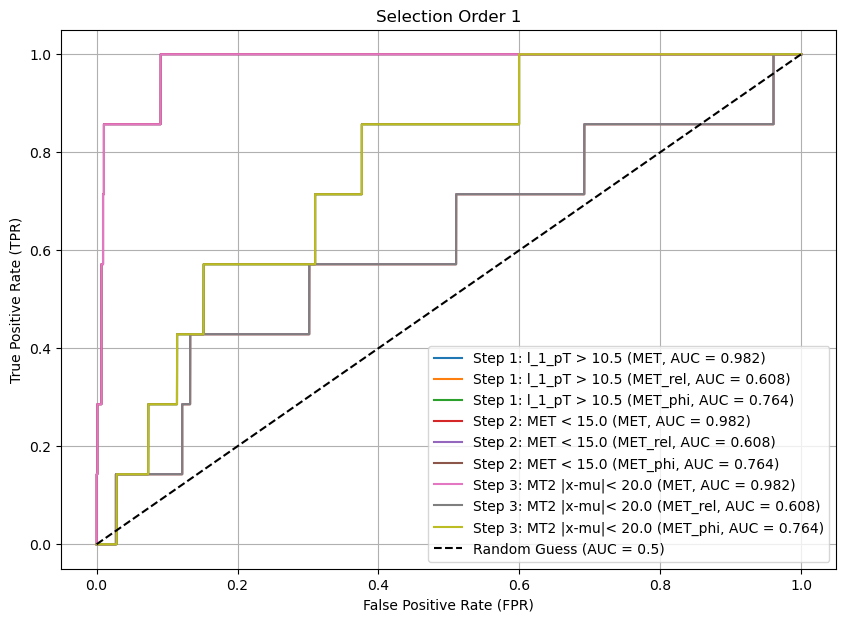

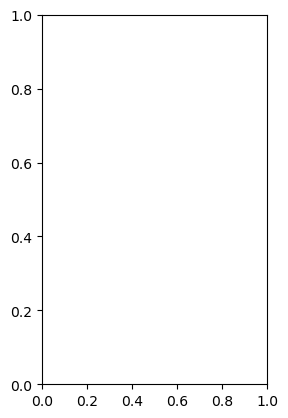

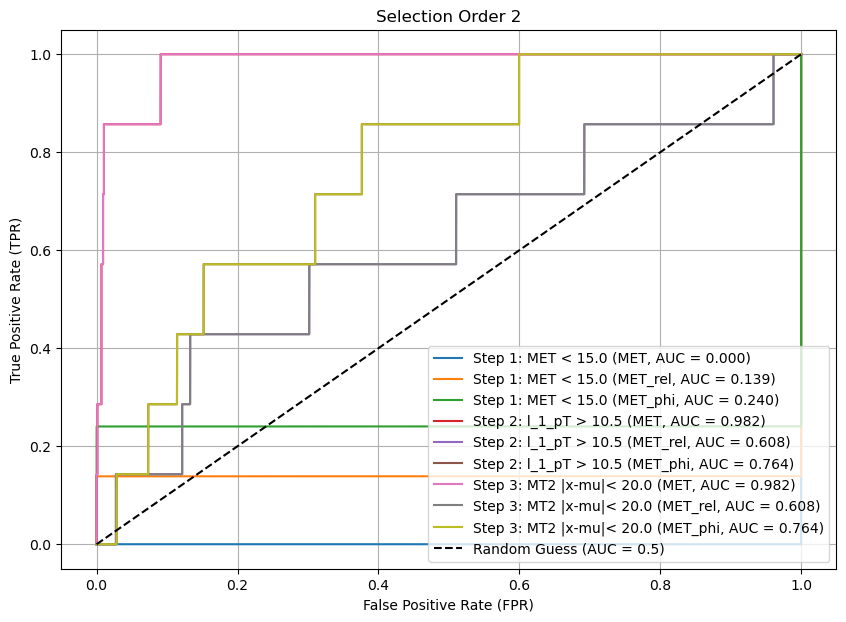

<Figure size 640x480 with 0 Axes>

In [39]:
### Exercise 7.4 ###

# Define two different selection orders
selection_order_1 = [
    ('l_1_pT', 10.5, '>'),
    ('MET', 15.0, '<'),
    ('MT2', 20.0, '|x-mu|<')
]

selection_order_2 = [
    ('MET', 15.0, '<'),
    ('l_1_pT', 10.5, '>'),
    ('MT2', 20.0, '|x-mu|<')
]

# Plot ROC curves for both selection orders.
def compare_selection_orders(data, observables, signal_mask, background_mask, order_1, order_2):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plot_roc_after_selections(
        data,
        observables,
        order_1,
        signal_mask,
        background_mask,
        title="Selection Order 1"
    )

    plt.subplot(1, 2, 2)
    plot_roc_after_selections(
        data,
        observables,
        order_2,
        signal_mask,
        background_mask,
        title="Selection Order 2"
    )
    
    plt.tight_layout()
    plt.show()

observables_to_compare = ['MET', 'MET_rel', 'MET_phi']

signal_mask = susy_df['signal'] == 1
background_mask = susy_df['signal'] == 0

# Activate the function.
compare_selection_orders(
    susy_df,
    observables_to_compare,
    signal_mask,
    background_mask,
    selection_order_1,
    selection_order_2
)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.2

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.3

Draw the ROC curve for $F_n$. 

### Exercise 8.4

What is the maximal significance you can obtain in the scenarios in exercise 5? 

In [41]:
### Exercise 8.1 ###

def compute_covariance_matrices(data, observables, label_column='signal'):

    # Splits data into two basic data sets for signal and background.
    signal_data = data[data[label_column] == 1][observables].values
    background_data = data[data[label_column] == 0][observables].values

    # Compute average vectors for signal and backgrounds data.
    m_signal = np.mean(signal_data, axis=0)
    m_background = np.mean(background_data, axis=0)

    # Covariance matrix between classes.
    mean_diff = m_background - m_signal
    S_B = np.outer(mean_diff, mean_diff)

    # Covariance matrix within classes.
    S_W_signal = np.sum(
        [(x - m_signal).reshape(-1, 1) @ (x - m_signal).reshape(1, -1) for x in signal_data],
        axis=0
    )
    S_W_background = np.sum(
        [(x - m_background).reshape(-1, 1) @ (x - m_background).reshape(1, -1) for x in background_data],
        axis=0
    )
    S_W = S_W_signal + S_W_background

    return S_B, S_W

observables = [
    'l_1_pT', 'l_1_eta', 'l_1_phi', 'l_2_pT', 'l_2_eta', 'l_2_phi', 
    'MET', 'MET_phi', 'MET_rel', 'dPhi_r_b', 'cos_theta_r1', 
    'R', 'M_TR_2', 'MT2', 'M_R', 'M_Delta_R', 'S_R', 'axial_MET'
]

# Compute matrices and display results.
S_B, S_W = compute_covariance_matrices(susy_df, observables, label_column='signal')

print("Between-class Covariance Matrix (S_B):")
print(S_B)

print("\nWithin-class Covariance Matrix (S_W):")
print(S_W)


Between-class Covariance Matrix (S_B):
[[ 2.87970231e-01  4.58922304e-04  4.67467434e-04  1.38148662e-01
   1.54068049e-03  3.66095560e-04  4.13461344e-01 -6.36618070e-04
   2.71136238e-01  1.54056891e-02  5.66281031e-02  5.53227373e-02
   2.66557653e-01  7.37824064e-02  1.82331687e-01  1.84116478e-01
   1.74241790e-01  8.54657090e-02]
 [ 4.58922304e-04  7.31359210e-07  7.44977113e-07  2.20159917e-04
   2.45529768e-06  5.83426339e-07  6.58910580e-04 -1.01454317e-06
   4.32094896e-04  2.45511986e-05  9.02450903e-05  8.81648006e-05
   4.24798257e-04  1.17582959e-04  2.90571971e-04  2.93416294e-04
   2.77679548e-04  1.36201995e-04]
 [ 4.67467434e-04  7.44977113e-07  7.58848582e-07  2.24259293e-04
   2.50101531e-06  5.94289733e-07  6.71179491e-04 -1.03343396e-06
   4.40140500e-04  2.50083417e-05  9.19254533e-05  8.98064286e-05
   4.32707998e-04  1.19772353e-04  2.95982420e-04  2.98879704e-04
   2.82849940e-04  1.38738075e-04]
 [ 1.38148662e-01  2.20159917e-04  2.24259293e-04  6.62743950e-0

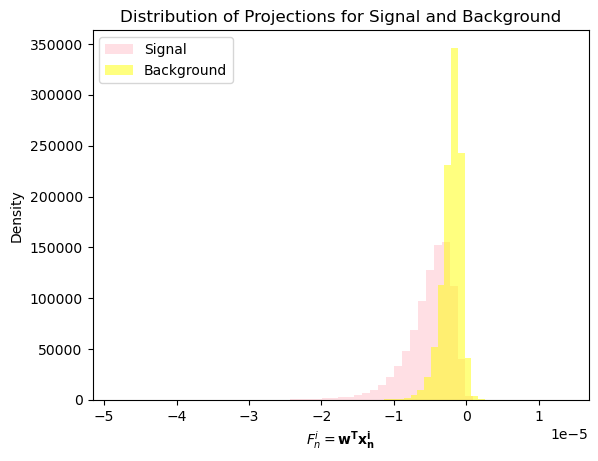

In [45]:
### Exercise 8.2 ###

def calculate_linear_coefficients(S_W, m_signal, m_background):

    mean_diff = m_background - m_signal
    w = np.linalg.solve(S_W, mean_diff)
    return w

def project_data(data, observables, w):

    x = data[observables].values
    projections = x @ w
    return projections

def plot_projections(signal_proj, background_proj):

    plt.hist(signal_proj, bins=50, alpha=0.5, label='Signal', density=True, color='pink')
    plt.hist(background_proj, bins=50, alpha=0.5, label='Background', density=True, color='yellow')
    plt.xlabel("$F_n^i = \\bf{w}^T\\bf{x}_n^i$")
    plt.ylabel("Density")
    plt.legend()
    plt.title("Distribution of Projections for Signal and Background")
    plt.show()


# Calculate averages for signal and background datasets.
m_signal = susy_df[susy_df['signal'] == 1][observables].mean().values
m_background = susy_df[susy_df['signal'] == 0][observables].mean().values

# Calculate linear coefficients
w = calculate_linear_coefficients(S_W, m_signal, m_background)

# Project data onto plots.
signal_proj = project_data(susy_df[susy_df['signal'] == 1], observables, w)
background_proj = project_data(susy_df[susy_df['signal'] == 0], observables, w)
plot_projections(signal_proj, background_proj)

/tmp/ipykernel_5027/19929479.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)", color='purple')


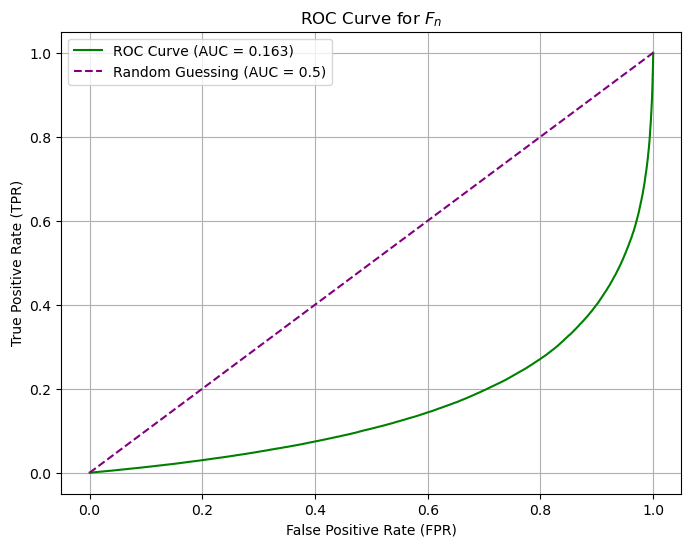

In [44]:
### Exercise 8.3 ###

def compute_roc(projections_signal, projections_background):

    # Combine signal and background projections
    projections = np.concatenate([projections_signal, projections_background])
    labels = np.concatenate([
        np.ones(len(projections_signal)),
        np.zeros(len(projections_background))
    ])
    
    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(labels, projections)
    auc_value = auc(fpr, tpr)
    return fpr, tpr, auc_value

# Create and label plot.
def plot_roc(fpr, tpr, auc_value):

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_value:.3f})", color='green')
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)", color='purple')
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve for $F_n$")
    plt.legend()
    plt.grid()
    plt.show()

# Compute the ROC curve and AUC for F_n
fpr, tpr, auc_value = compute_roc(signal_proj, background_proj)

# Plot the ROC curve
plot_roc(fpr, tpr, auc_value)

In [48]:
### Exercise 8.4 ###

from pprint import pprint

def compute_max_significance(projections_signal, projections_background, N_S, N_B):

    # Combines both projections for signal and background.
    projections = np.concatenate([projections_signal, projections_background])
    labels = np.concatenate([
        np.ones(len(projections_signal)),
        np.zeros(len(projections_background))
    ])
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, projections)
    
    # Calculates efficiencies
    epsilon_S = tpr
    epsilon_B = fpr
    
    # Calculates N'_S and N'_B
    N_S_prime = epsilon_S * N_S
    N_B_prime = epsilon_B * N_B

    print(N_S_prime)
    print(N_B_prime)
    
    # Compute significance
    significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
    
    # Find the maximal significance
    max_idx = np.argmax(significance)
    max_significance = significance[max_idx]
    best_threshold = thresholds[max_idx]
    
    return max_significance, best_threshold

scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000}
]

# Store results in a dictionary.
results = {}

for i, scenario in enumerate(scenarios, 1):
    N_S, N_B = scenario["N_S"], scenario["N_B"]
    max_significance, best_threshold = compute_max_significance(signal_proj, background_proj, N_S, N_B)
    results[f"Scenario {i}"] = {"Max Significance": max_significance, "Best Threshold": best_threshold}

pprint(results)

[ 0.          0.          0.         ...  9.99869136  9.99869136
 10.        ]
[0.00000000e+00 3.69337593e-04 5.54006390e-03 ... 9.99996307e+01
 1.00000000e+02 1.00000000e+02]
[  0.           0.           0.         ...  99.98691356  99.98691356
 100.        ]
[0.00000000e+00 3.69337593e-03 5.54006390e-02 ... 9.99996307e+02
 1.00000000e+03 1.00000000e+03]


/tmp/ipykernel_5027/3759348714.py:29: RuntimeWarning: invalid value encountered in divide
  significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
/tmp/ipykernel_5027/3759348714.py:29: RuntimeWarning: invalid value encountered in divide
  significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)


[   0.            0.            0.         ...  999.86913564  999.86913564
 1000.        ]
[0.00000000e+00 3.69337593e-02 5.54006390e-01 ... 9.99996307e+03
 1.00000000e+04 1.00000000e+04]
[    0.             0.             0.         ...  9998.69135641
  9998.69135641 10000.        ]
[0.00000000e+00 3.69337593e-01 5.54006390e+00 ... 9.99996307e+04
 1.00000000e+05 1.00000000e+05]
{'Scenario 1': {'Best Threshold': inf, 'Max Significance': nan},
 'Scenario 2': {'Best Threshold': inf, 'Max Significance': nan},
 'Scenario 3': {'Best Threshold': inf, 'Max Significance': nan},
 'Scenario 4': {'Best Threshold': inf, 'Max Significance': nan}}


/tmp/ipykernel_5027/3759348714.py:29: RuntimeWarning: invalid value encountered in divide
  significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
/tmp/ipykernel_5027/3759348714.py:29: RuntimeWarning: invalid value encountered in divide
  significance = N_S_prime / np.sqrt(N_S_prime + N_B_prime)
